In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io as sio
import seaborn as sns 
from sklearn.preprocessing import LabelBinarizer , StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score,ConfusionMatrixDisplay
from xgboost import XGBClassifier, plot_importance
from sklearn.linear_model import LogisticRegression , RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from numpy import absolute
from numpy import sqrt
from numpy import mean
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import pandas as pd
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.utils import resample
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier , VotingClassifier , RandomForestClassifier

In [3]:
data = pd.read_csv("train.csv")
data.head(10)

SX  AG  SM   CPD  BPM  PS  PH  DB     TC    SBP    DBP    BMI    HR     GL  \
0   1  39   0   0.0  0.0   0   0   0  195.0  106.0   70.0  26.97  80.0   77.0   
1   0  46   0   0.0  0.0   0   0   0  250.0  121.0   81.0  28.73  95.0   76.0   
2   1  48   1  20.0  0.0   0   0   0  245.0  127.5   80.0  25.34  75.0   70.0   
3   0  61   1  30.0  0.0   0   1   0  225.0  150.0   95.0  28.58  65.0  103.0   
4   0  46   1  23.0  0.0   0   0   0  285.0  130.0   84.0  23.10  85.0   85.0   
5   0  43   0   0.0  0.0   0   1   0  228.0  180.0  110.0  30.30  77.0   99.0   
6   0  63   0   0.0  0.0   0   0   0  205.0  138.0   71.0  33.11  60.0   85.0   
7   0  45   1  20.0  0.0   0   0   0  313.0  100.0   71.0  21.68  79.0   78.0   
8   1  52   0   0.0  0.0   0   1   0  260.0  141.5   89.0  26.36  76.0   79.0   
9   1  43   1  30.0  0.0   0   1   0  225.0  162.0  107.0  23.61  93.0   88.0   

   HD  
0   0  
1   0  
2   0  
3   1  
4   0  
5   0  
6   1  
7   0  
8   0  
9   0

In [4]:
data.tail(10)

SX  AG  SM   CPD  BPM  PS  PH  DB     TC    SBP    DBP    BMI    HR  \
3380   0  48   1   5.0  0.0   0   0   0  262.0  141.0   88.0  25.21  80.0   
3381   1  51   0   0.0  0.0   0   1   0  227.0  158.0  105.0  27.22  60.0   
3382   0  61   0   0.0  0.0   0   1   0  254.0  168.0   92.0  31.63  80.0   
3383   1  56   1  43.0  0.0   0   1   0  240.0  128.5   87.5  31.50  80.0   
3384   1  41   0   0.0  0.0   0   0   0  245.0  139.0   84.0  28.76  95.0   
3385   1  47   1  15.0  0.0   0   0   0  206.0  125.0   72.0  21.14  80.0   
3386   0  50   1  25.0  0.0   0   0   0  330.0  119.0   86.0  26.30  86.0   
3387   1  37   1  30.0  0.0   0   0   0  249.0  112.0   70.0  22.79  56.0   
3388   1  59   1  20.0  0.0   0   0   0  163.0  138.0   80.0  31.08  70.0   
3389   1  50   1  20.0  0.0   0   0   0  265.0  110.0   65.0  24.45  69.0   

        GL  HD  
3380   NaN   0  
3381  96.0   1  
3382  90.0   0  
3383   NaN   0  
3384  68.0   0  
3385  74.0   0  
3386   NaN   0  
3387  76.0   0  
3388  70.0   0  
3389  70.0   0

In [5]:
#Shape of Data
data.shape

(3390, 15)

In [6]:
data['HD'].value_counts()

0    2873
1     517
Name: HD, dtype: int64

In [ ]:
#infromation of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SX      3390 non-null   int64  
 1   AG      3390 non-null   int64  
 2   SM      3390 non-null   int64  
 3   CPD     3367 non-null   float64
 4   BPM     3346 non-null   float64
 5   PS      3390 non-null   int64  
 6   PH      3390 non-null   int64  
 7   DB      3390 non-null   int64  
 8   TC      3348 non-null   float64
 9   SBP     3390 non-null   float64
 10  DBP     3390 non-null   float64
 11  BMI     3371 non-null   float64
 12  HR      3389 non-null   float64
 13  GL      3072 non-null   float64
 14  HD      3390 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 397.4 KB


In [ ]:
#lets describe the data
data.describe()

SX           AG           SM          CPD          BPM  \
count  3390.000000  3390.000000  3390.000000  3367.000000  3346.000000   
mean      0.425369    49.564602     0.494395     8.974458     0.028691   
std       0.494472     8.568013     0.500042    11.870111     0.166961   
min       0.000000    32.000000     0.000000     0.000000     0.000000   
25%       0.000000    42.000000     0.000000     0.000000     0.000000   
50%       0.000000    49.000000     0.000000     0.000000     0.000000   
75%       1.000000    56.000000     1.000000    20.000000     0.000000   
max       1.000000    70.000000     1.000000    70.000000     1.000000   

                PS           PH           DB           TC          SBP  \
count  3390.000000  3390.000000  3390.000000  3348.000000  3390.000000   
mean      0.005015     0.305015     0.023009   237.256272   132.183038   
std       0.070648     0.460482     0.149954    44.830218    21.868974   
min       0.000000     0.000000     0.000000   107.000000    83.500000   
25%       0.000000     0.000000     0.000000   206.000000   117.000000   
50%       0.000000     0.000000     0.000000   234.000000   128.000000   
75%       0.000000     1.000000     0.000000   264.000000   143.000000   
max       1.000000     1.000000     1.000000   696.000000   295.000000   

               DBP          BMI           HR           GL           HD  
count  3390.000000  3371.000000  3389.000000  3072.000000  3390.000000  
mean     82.889086    25.815823    75.623488    81.667318     0.152507  
std      11.765666     4.067961    11.971946    22.111393     0.359565  
min      50.000000    15.540000    44.000000    40.000000     0.000000  
25%      75.000000    23.090000    68.000000    71.000000     0.000000  
50%      82.000000    25.380000    75.000000    78.000000     0.000000  
75%      90.000000    28.090000    82.000000    87.000000     0.000000  
max     142.500000    56.800000   143.000000   394.000000     1.000000

In [ ]:
data.count()

SX     3390
AG     3390
SM     3390
CPD    3367
BPM    3346
PS     3390
PH     3390
DB     3390
TC     3348
SBP    3390
DBP    3390
BMI    3371
HR     3389
GL     3072
HD     3390
dtype: int64

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['SX']= label_encoder.fit_transform(data['SX'])
  
data['SX'].unique()

array([1, 0])

In [ ]:
data.head(2)

SX  AG  SM  CPD  BPM  PS  PH  DB     TC    SBP   DBP    BMI    HR    GL  HD
0   1  39   0  0.0  0.0   0   0   0  195.0  106.0  70.0  26.97  80.0  77.0   0
1   0  46   0  0.0  0.0   0   0   0  250.0  121.0  81.0  28.73  95.0  76.0   0

In [ ]:
label_encoder = preprocessing.LabelEncoder()
data['SM']= label_encoder.fit_transform(data['SM'])
  
data['SM'].unique()

array([0, 1])

In [ ]:
data.head(2)

SX  AG  SM  CPD  BPM  PS  PH  DB     TC    SBP   DBP    BMI    HR    GL  HD
0   1  39   0  0.0  0.0   0   0   0  195.0  106.0  70.0  26.97  80.0  77.0   0
1   0  46   0  0.0  0.0   0   0   0  250.0  121.0  81.0  28.73  95.0  76.0   0

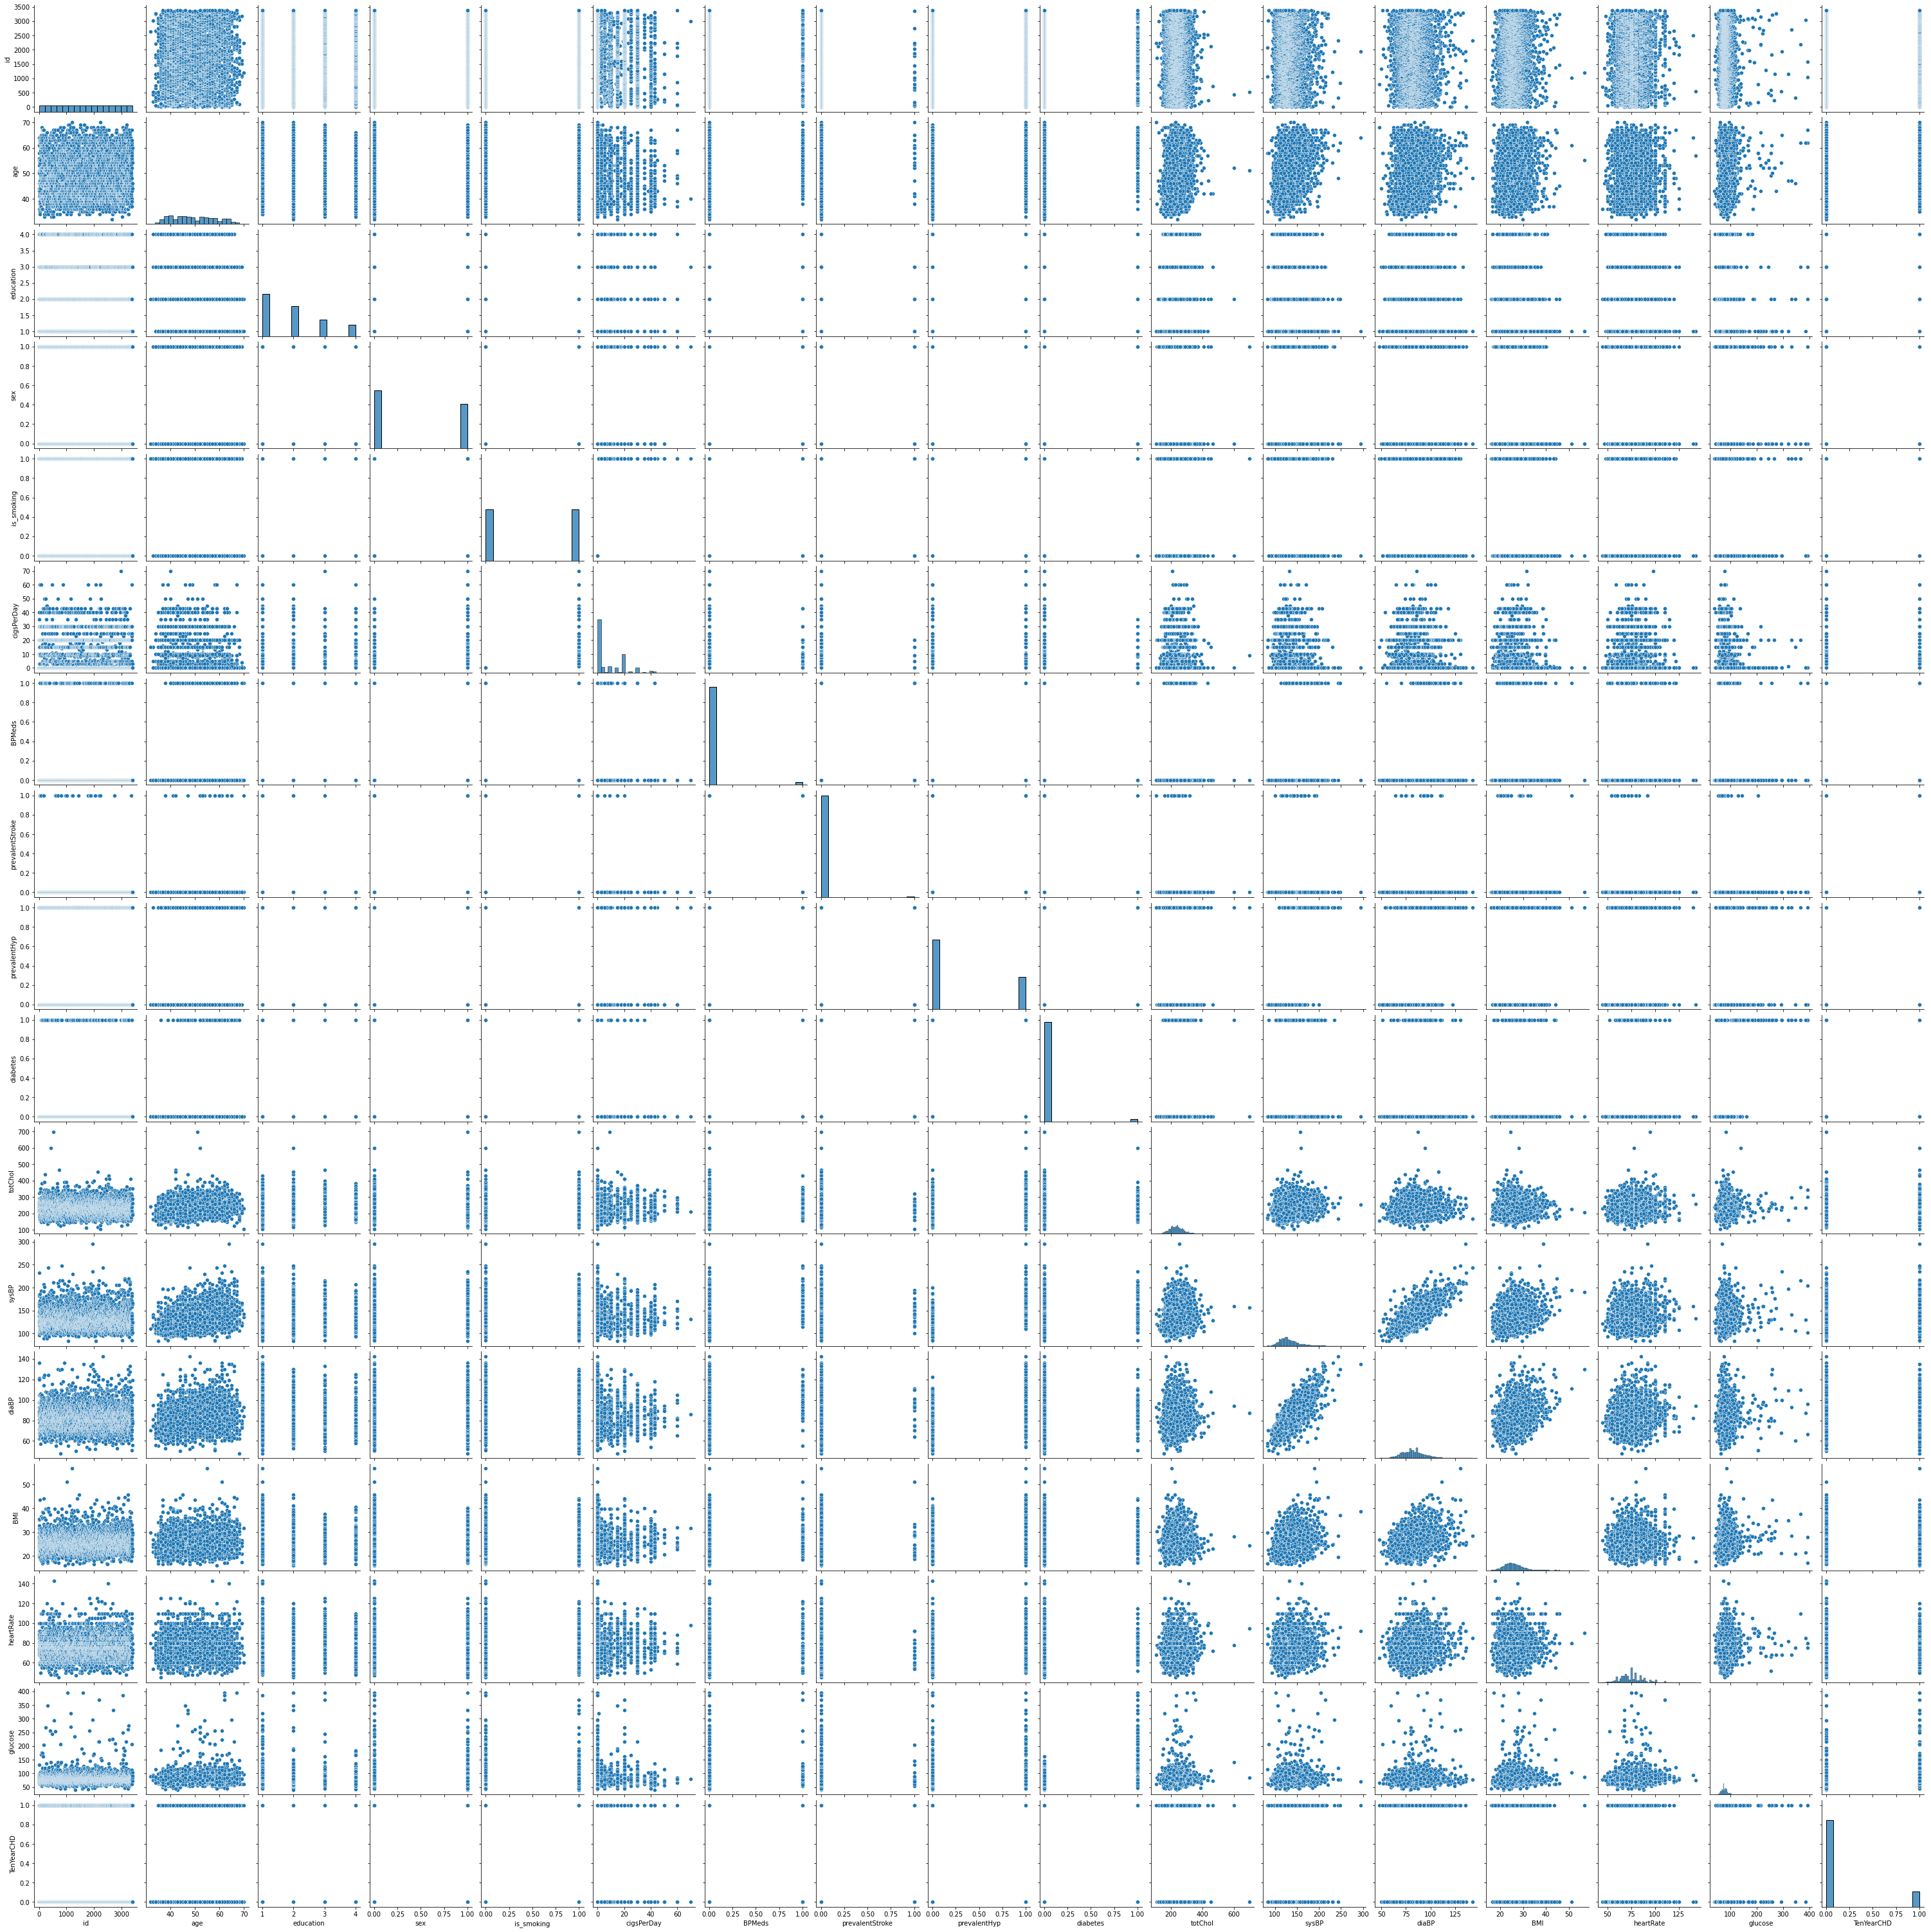

In [ ]:
sns.pairplot(data)

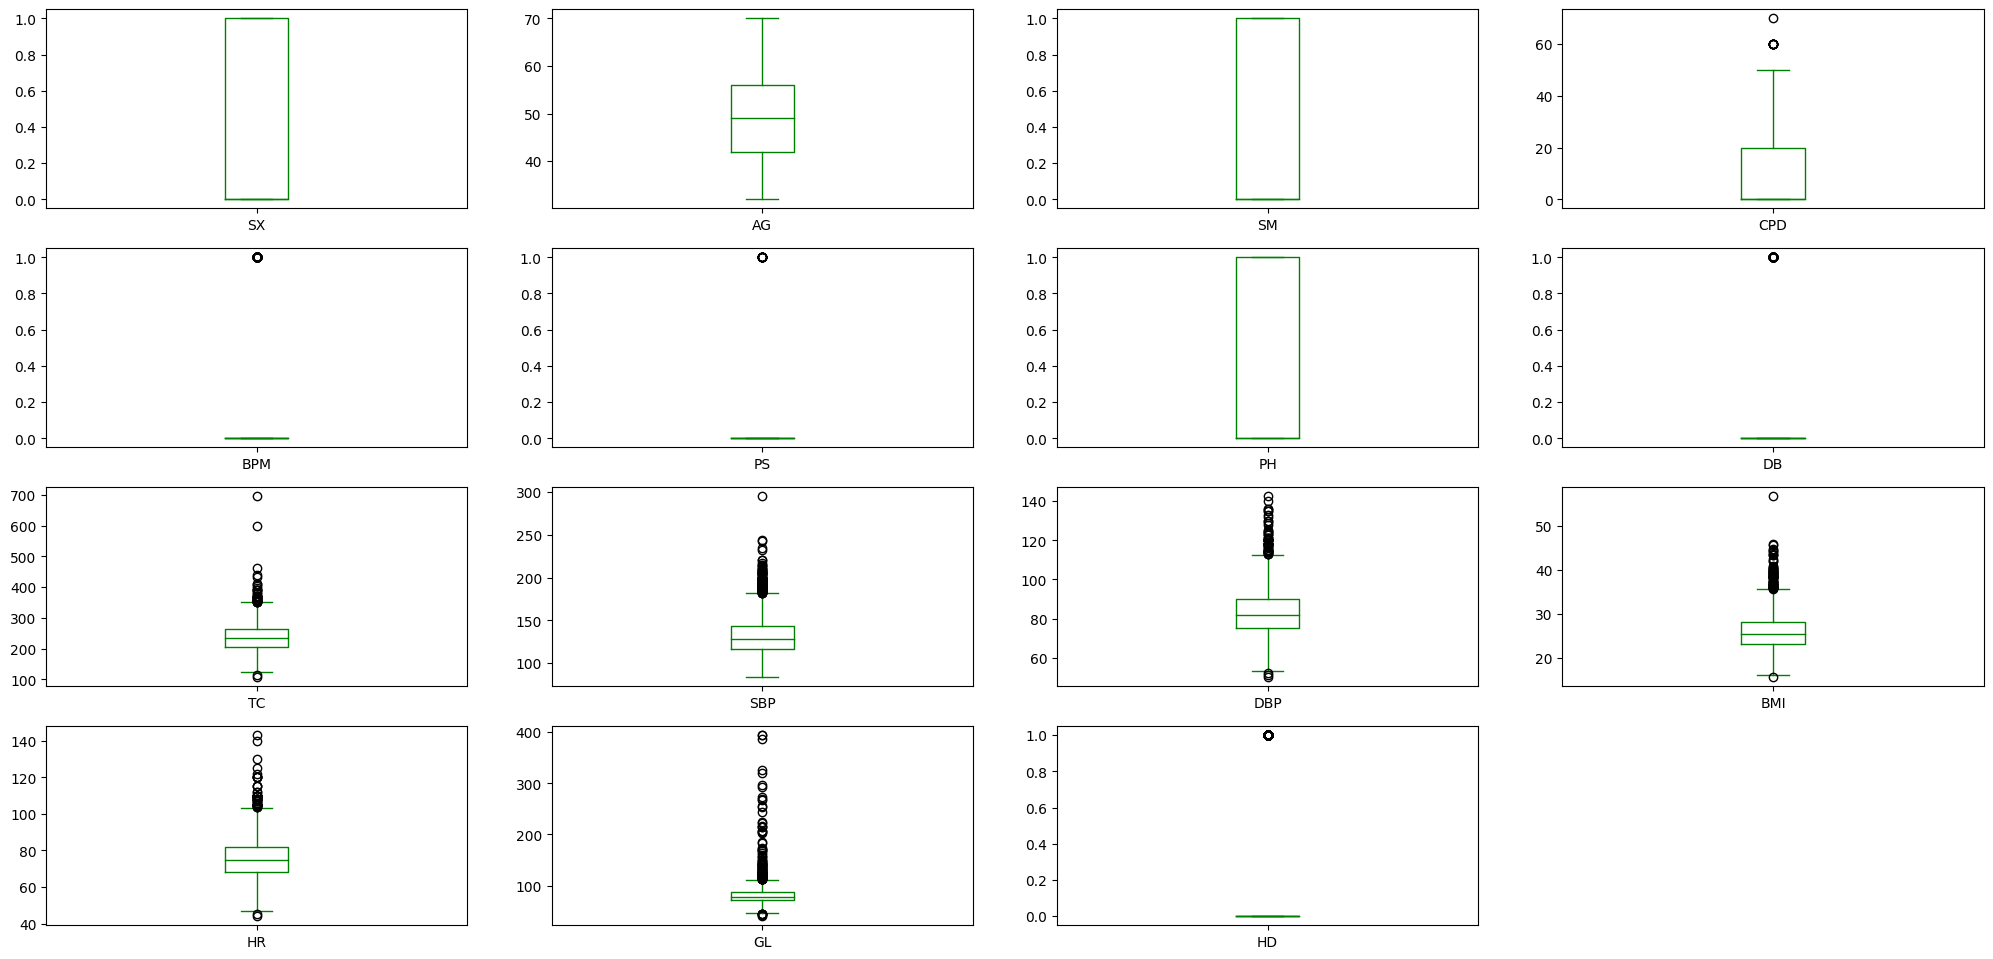

In [ ]:
data.plot(color = 'g', kind='box', figsize=(25, 15), subplots=True, layout=(5,4))
plt.show()

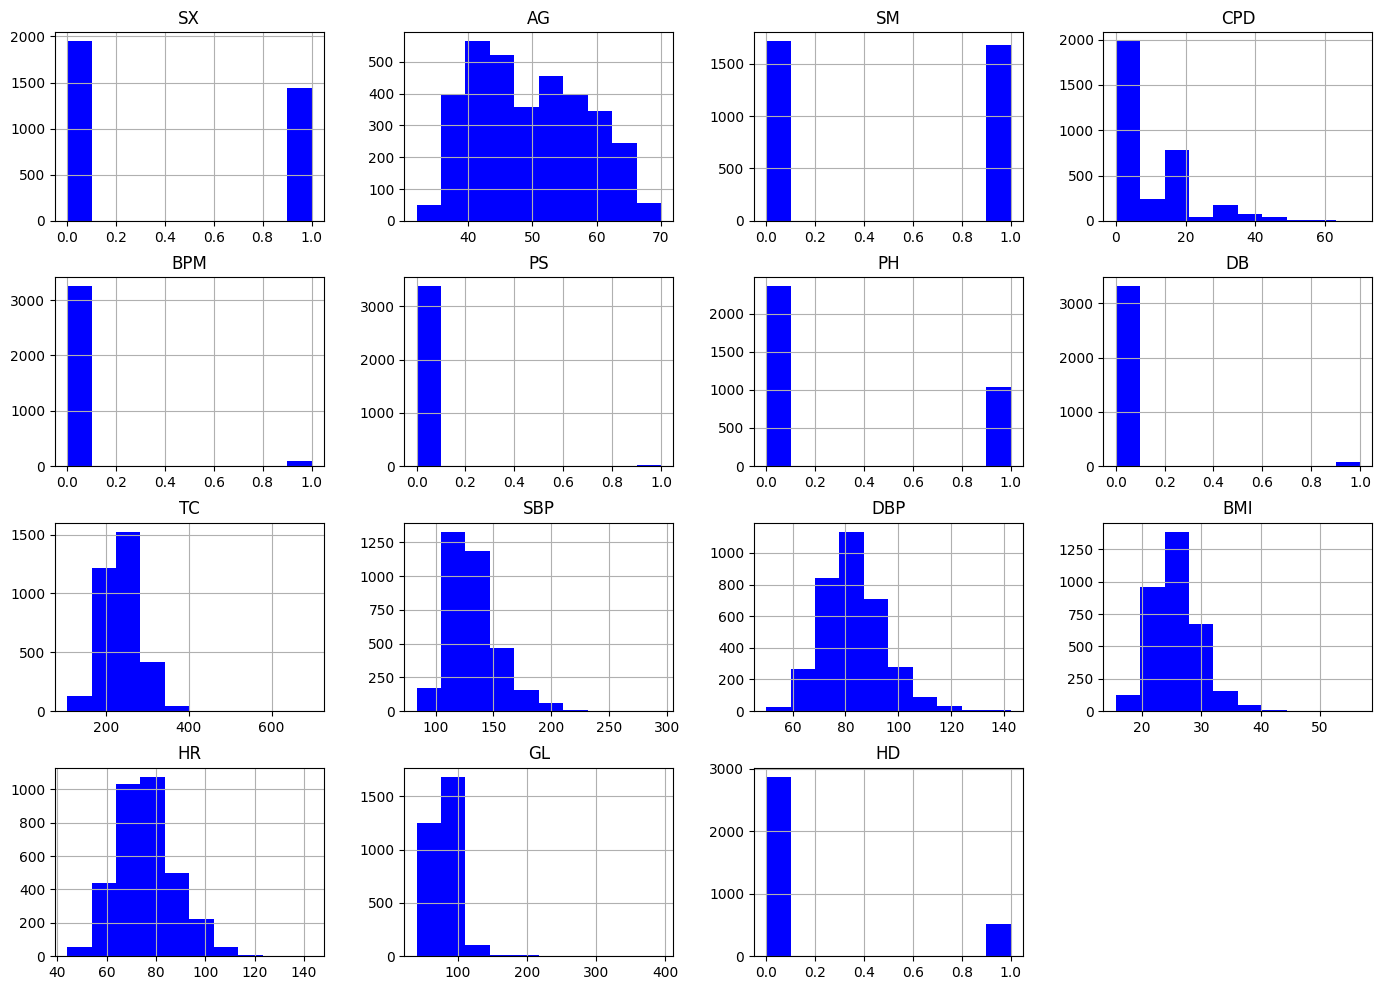

In [ ]:
#histogram
data.hist(color='Blue',bins=10,figsize=(17,12))
plt.show()

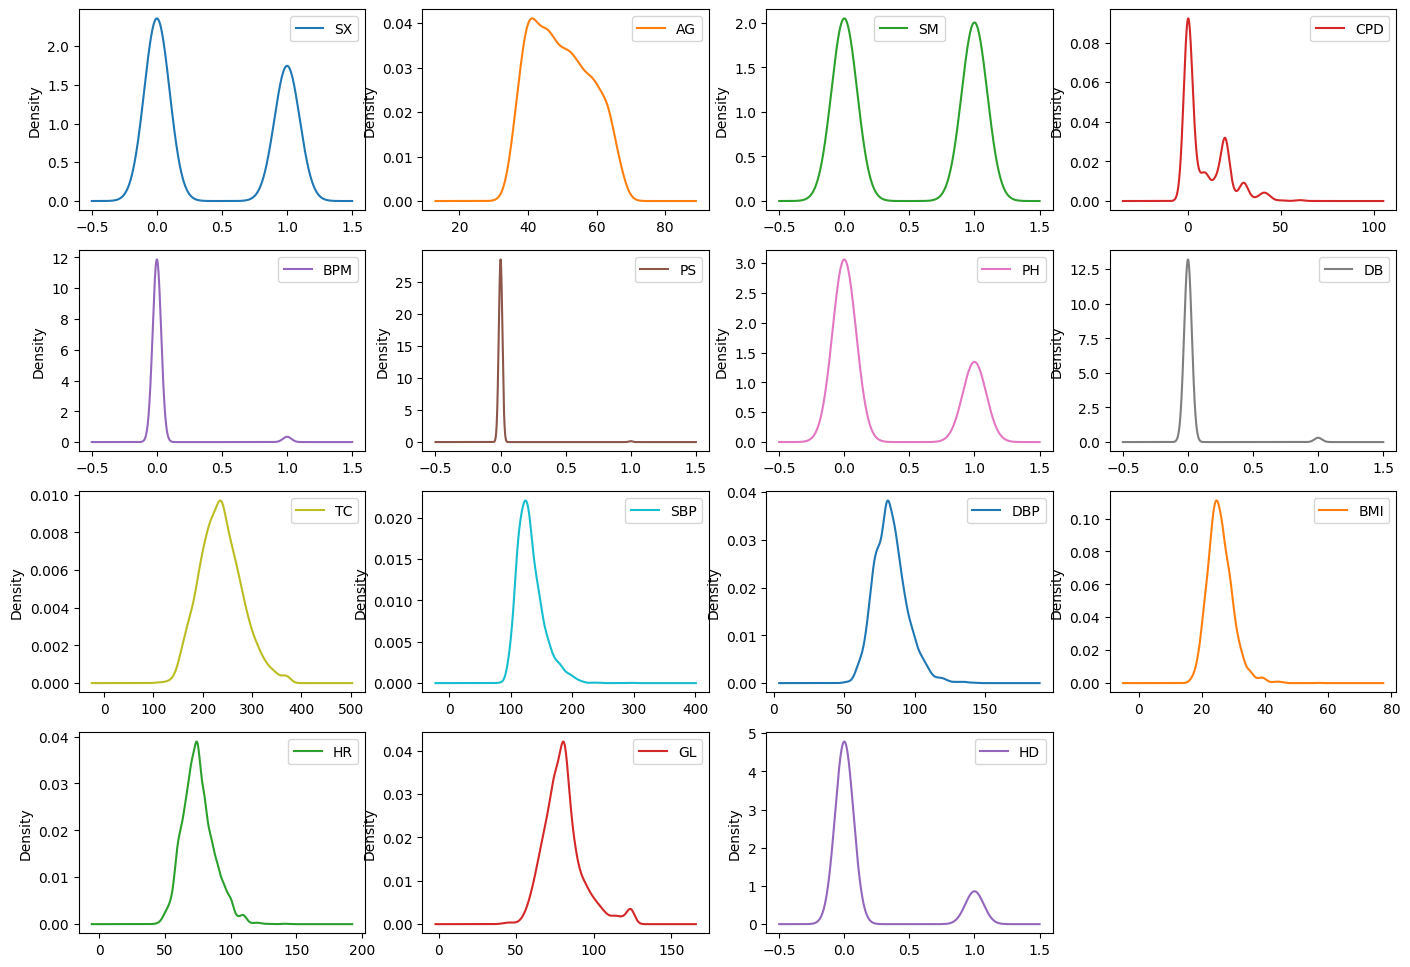

In [ ]:
#Boxplot of each column
data.plot( kind='density', figsize=(17,12), subplots=True, layout=(4,4),sharex=False)
plt.show()

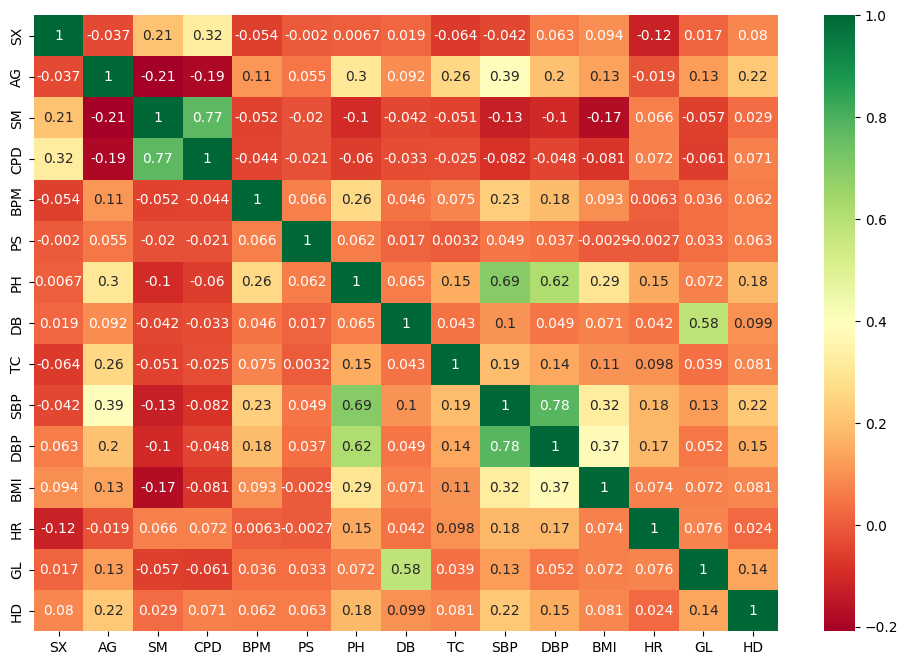

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
import plotly.graph_objects as go

In [ ]:
column_names = data.columns
no_of_boxes = len(column_names)
colors = [ 'hsl(' + str(h) + ',50%' + ',50%)' for h in np.linspace(0, 360, no_of_boxes)]

fig = go.Figure(data = [go.Box(y = data.loc[:, column_names[i]], marker_color = colors[i], name = column_names[i], boxmean = True, showlegend = True) for i in range(no_of_boxes)])

fig.update_layout(
    xaxis=dict(showgrid = True, zeroline = True, showticklabels = True),
    yaxis=dict(zeroline = True, gridcolor = 'white'),
    paper_bgcolor = 'rgb(233,233,233)',
    plot_bgcolor = 'rgb(233,233,233)')

fig.show()

<Axes: >

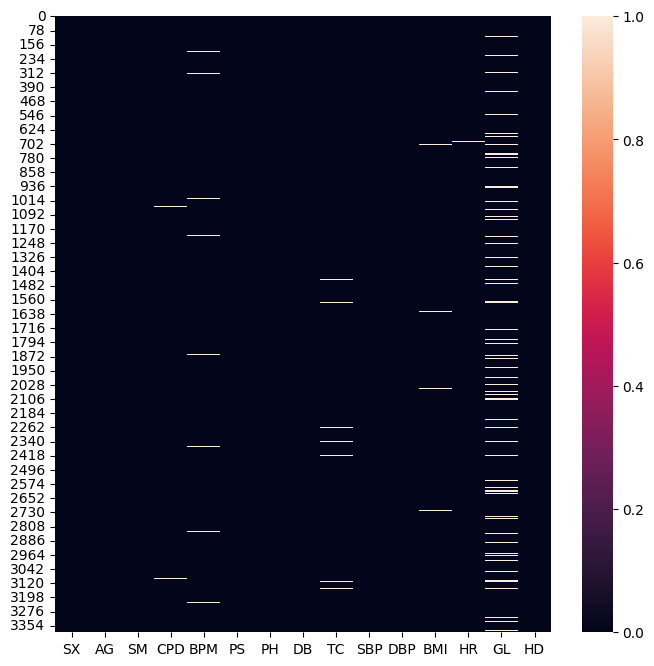

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [ ]:
data['CPD'].fillna(int(data['CPD'].mean()), inplace=True)

In [ ]:
data['BPM'].fillna(int(data['BPM'].mean()), inplace=True)

In [ ]:
data['TC'].fillna(int(data['TC'].mean()), inplace=True)

In [ ]:
data['BMI'].fillna(int(data['BMI'].mean()), inplace=True)

In [ ]:
data['HR'].fillna(int(data['HR'].mean()), inplace=True)

In [ ]:
data['GL'].fillna(int(data['GL'].mean()), inplace=True)

<Axes: >

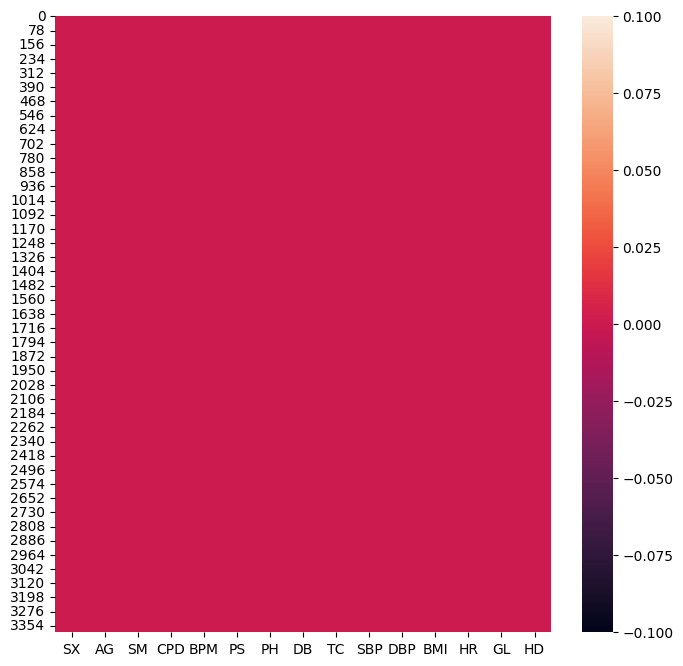

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(data.isnull())

In [ ]:
data.head(10)

SX  AG  SM   CPD  BPM  PS  PH  DB     TC    SBP    DBP    BMI    HR     GL  \
0   1  39   0   0.0  0.0   0   0   0  195.0  106.0   70.0  26.97  80.0   77.0   
1   0  46   0   0.0  0.0   0   0   0  250.0  121.0   81.0  28.73  95.0   76.0   
2   1  48   1  20.0  0.0   0   0   0  245.0  127.5   80.0  25.34  75.0   70.0   
3   0  61   1  30.0  0.0   0   1   0  225.0  150.0   95.0  28.58  65.0  103.0   
4   0  46   1  23.0  0.0   0   0   0  285.0  130.0   84.0  23.10  85.0   85.0   
5   0  43   0   0.0  0.0   0   1   0  228.0  180.0  110.0  30.30  77.0   99.0   
6   0  63   0   0.0  0.0   0   0   0  205.0  138.0   71.0  33.11  60.0   85.0   
7   0  45   1  20.0  0.0   0   0   0  313.0  100.0   71.0  21.68  79.0   78.0   
8   1  52   0   0.0  0.0   0   1   0  260.0  141.5   89.0  26.36  76.0   79.0   
9   1  43   1  30.0  0.0   0   1   0  225.0  162.0  107.0  23.61  93.0   88.0   

   HD  
0   0  
1   0  
2   0  
3   1  
4   0  
5   0  
6   1  
7   0  
8   0  
9   0

In [ ]:
#checking for the out layers with STD
print("Highest allowed",data['TC'].mean() + 3*data['TC'].std())
print("Lowest allowed",data['TC'].mean() - 3*data['TC'].std())

Highest allowed 370.9078071919522
Lowest allowed 103.59838749831329


In [ ]:
#dealing with out layer values 
data[(data['TC'] > 350) | (data['TC'] < 110)]


SX  AG  SM   CPD  BPM  PS  PH  DB     TC    SBP    DBP    BMI     HR  \
194    0  42   0   0.0  0.0   0   0   0  464.0  128.0   87.0  22.90   72.0   
259    0  60   0   0.0  0.0   0   1   0  352.0  197.5  105.0  36.29   75.0   
333    0  55   0   0.0  1.0   0   1   0  368.0  204.0   94.0  25.20  100.0   
533    0  53   0   0.0  0.0   0   0   0  370.0  123.0   83.0  24.64   63.0   
543    1  47   1  18.0  0.0   0   1   0  439.0  145.0   74.0  22.42  100.0   
617    0  51   1   3.0  0.0   0   1   0  398.0  161.0   96.0  23.63   77.0   
670    0  65   0   0.0  0.0   0   0   0  355.0  138.0   79.0  28.38   75.0   
920    0  60   1  15.0  0.0   0   0   0  353.0  116.0   82.0  22.66   85.0   
926    1  61   1  20.0  0.0   0   1   0  360.0  157.0   99.0  28.74   95.0   
998    0  57   0   0.0  0.0   0   0   0  372.0  122.0   80.0  21.02   65.0   
1103   0  60   1  20.0  0.0   0   1   0  352.0  149.0   73.0  25.96   80.0   
1111   0  52   0   0.0  0.0   0   1   1  600.0  159.5   94.0  28.27   78.0   
1150   0  46   1  10.0  0.0   0   0   0  392.0  113.0   68.0  23.35   70.0   
1389   0  51   0   0.0  1.0   0   1   0  358.0  134.0   87.0  29.36   75.0   
1447   0  60   0   0.0  0.0   0   0   0  391.0  114.0   64.0  24.57   82.0   
1544   1  42   1  20.0  0.0   0   0   0  410.0  116.0   83.0  21.68   90.0   
1610   0  61   1   8.0  0.0   0   1   0  356.0  168.0   98.0  27.30  103.0   
1624   0  70   0   0.0  0.0   1   1   0  107.0  143.0   93.0  25.00   68.0   
1691   0  64   0   0.0  0.0   0   1   0  372.0  169.0   85.0  26.01   75.0   
1710   0  57   0   0.0  0.0   0   1   0  366.0  146.5   80.0  24.19   85.0   
1870   0  47   1   8.0  0.0   0   0   0  365.0  127.0   76.0  24.44   72.0   
1932   0  63   0   0.0  0.0   0   0   0  362.0  151.5   82.5  25.15  102.0   
1937   0  59   0   0.0  0.0   0   1   0  410.0  142.0   79.0  25.58   78.0   
2014   0  51   0   0.0  0.0   0   1   0  351.0  134.0   97.5  21.66  100.0   
2024   0  62   0   0.0  0.0   0   1   1  390.0  184.5   83.0  18.99   87.0   
2206   1  46   1  15.0  0.0   0   1   0  405.0  181.5  102.5  26.33   98.0   
2208   0  42   1  10.0  0.0   0   0   0  359.0  115.0   71.0  24.46   75.0   
2349   0  63   0   0.0  0.0   0   1   0  380.0  175.0   78.0  20.15   68.0   
2363   1  42   1   5.0  0.0   0   0   0  355.0  113.0   81.0  26.17   90.0   
2368   0  54   1   5.0  0.0   0   1   0  390.0  150.0   94.0  27.34   75.0   
2488   0  67   1  15.0  0.0   0   1   0  371.0  166.0   85.0  25.35  100.0   
2602   0  60   0   0.0  0.0   0   0   0  354.0  130.0   82.5  26.76   65.0   
2607   0  57   0   0.0  0.0   0   1   0  382.0  133.0   77.0  24.27   75.0   
2671   0  59   0   0.0  0.0   0   0   0  364.0  142.0   84.0  26.24   67.0   
2797   1  43   0   0.0  0.0   0   1   0  367.0  141.0   82.5  25.62   92.0   
2972   0  51   1  15.0  0.0   0   0   0  352.0  136.5   87.0  25.79   73.0   
2985   0  57   0   0.0  1.0   0   1   0  432.0  153.0   85.0  26.13   98.0   
3056   0  44   1   8.0  0.0   0   0   0  351.0  106.0   65.0  25.34   95.0   
3160   1  51   1   9.0  0.0   0   1   0  696.0  157.0   87.0  24.44   95.0   
3165   1  44   1  30.0  0.0   0   0   0  363.0  140.0   87.0  26.44   95.0   

         GL  HD  
194    72.0   1  
259    95.0   1  
333    81.0   0  
533    74.0   1  
543    90.0   1  
617    83.0   0  
670   108.0   0  
920    71.0   0  
926    73.0   0  
998    81.0   0  
1103   79.0   0  
1111  140.0   1  
1150   63.0   0  
1389   87.0   1  
1447   83.0   0  
1544   83.0   0  
1610  106.0   0  
1624   62.0   1  
1691   79.0   1  
1710   73.0   0  
1870   80.0   0  
1932   81.0   0  
1937   90.0   0  
2014   81.0   0  
2024   47.0   0  
2206   97.0   1  
2208   68.0   0  
2349   95.0   1  
2363   71.0   0  
2368   71.0   0  
2488   86.0   0  
2602   79.0   0  
2607   81.0   0  
2671   70.0   0  
2797   90.0   0  
2972   67.0   0  
2985   75.0   1  
3056   69.0   0  
3160   84.0   0  
3165   79.0   0

In [ ]:
new_df = data[(data['TC'] <350) & (data['TC'] >110)]
new_df

SX  AG  SM   CPD  BPM  PS  PH  DB     TC    SBP   DBP    BMI    HR  \
0      1  39   0   0.0  0.0   0   0   0  195.0  106.0  70.0  26.97  80.0   
1      0  46   0   0.0  0.0   0   0   0  250.0  121.0  81.0  28.73  95.0   
2      1  48   1  20.0  0.0   0   0   0  245.0  127.5  80.0  25.34  75.0   
3      0  61   1  30.0  0.0   0   1   0  225.0  150.0  95.0  28.58  65.0   
4      0  46   1  23.0  0.0   0   0   0  285.0  130.0  84.0  23.10  85.0   
...   ..  ..  ..   ...  ...  ..  ..  ..    ...    ...   ...    ...   ...   
3385   1  47   1  15.0  0.0   0   0   0  206.0  125.0  72.0  21.14  80.0   
3386   0  50   1  25.0  0.0   0   0   0  330.0  119.0  86.0  26.30  86.0   
3387   1  37   1  30.0  0.0   0   0   0  249.0  112.0  70.0  22.79  56.0   
3388   1  59   1  20.0  0.0   0   0   0  163.0  138.0  80.0  31.08  70.0   
3389   1  50   1  20.0  0.0   0   0   0  265.0  110.0  65.0  24.45  69.0   

         GL  HD  
0      77.0   0  
1      76.0   0  
2      70.0   0  
3     103.0   1  
4      85.0   0  
...     ...  ..  
3385   74.0   0  
3386   81.0   0  
3387   76.0   0  
3388   70.0   0  
3389   70.0   0  

[3348 rows x 15 columns]

In [ ]:
#storing the values 
upper_limit = data['TC'].mean() + 3*data['TC'].std()
lower_limit = data['TC'].mean() - 3*data['TC'].std()

In [ ]:
data['TC'] = np.where(
    data['TC']>upper_limit,
    upper_limit,
    np.where(
        data['TC']<lower_limit,
        lower_limit,
        data['TC']
    )
)

In [ ]:
data['TC'].describe()

count    3390.000000
mean      236.952903
std        43.020900
min       107.000000
25%       207.000000
50%       235.000000
75%       264.000000
max       370.907807
Name: TC, dtype: float64

<ipython-input-38-8193c83dc3f1>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-38-8193c83dc3f1>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




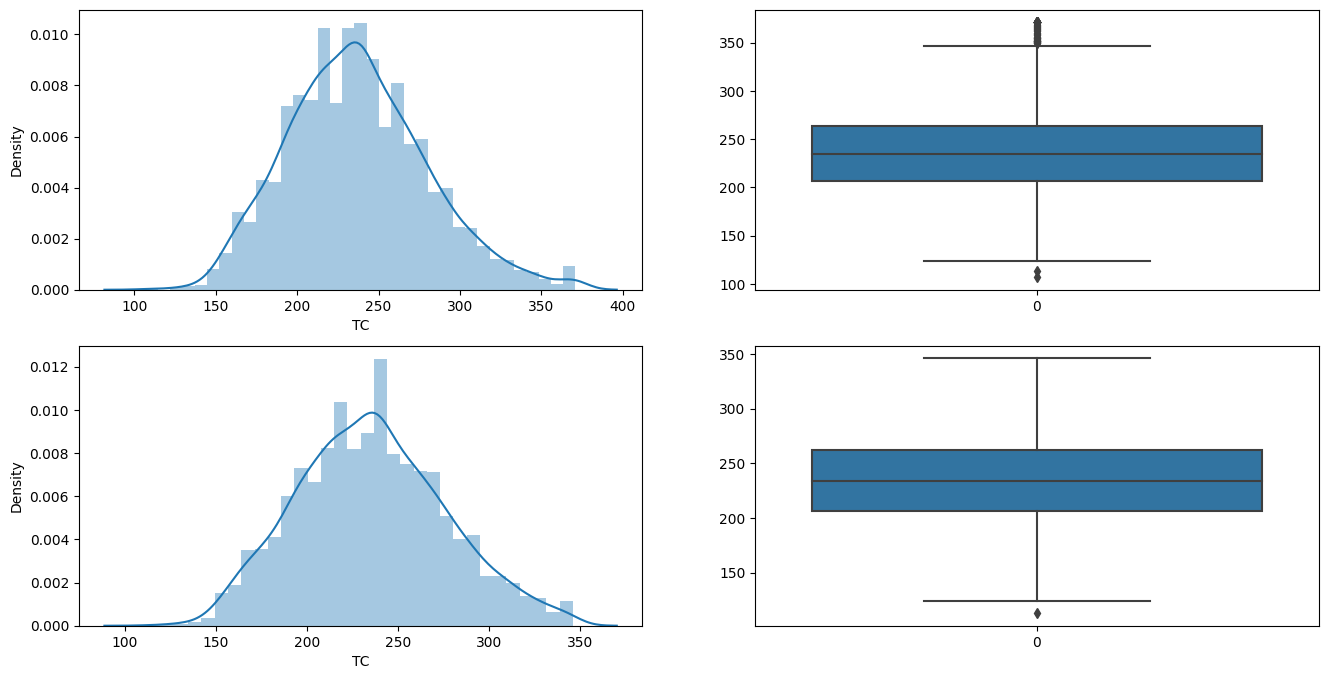

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['TC'])
plt.subplot(2,2,2)
sns.boxplot(data['TC'])
plt.subplot(2,2,3)
sns.distplot(new_df['TC'])
plt.subplot(2,2,4)
sns.boxplot(new_df['TC'])
plt.show()

In [ ]:
#checking for the out layers with STD
print("Highest allowed",data['GL'].mean() + 3*data['GL'].std())
print("Lowest allowed",data['GL'].mean() - 3*data['GL'].std())

Highest allowed 144.75278428405326
Lowest allowed 18.456655243970346


In [ ]:
#dealing with out layer values 
data[(data['GL'] > 100) | (data['GL'] < 55)]

SX  AG  SM   CPD  BPM  PS  PH  DB     TC    SBP   DBP    BMI    HR  \
3      0  61   1  30.0  0.0   0   1   0  225.0  150.0  95.0  28.58  65.0   
22     0  52   0   0.0  0.0   0   0   0  234.0  148.0  78.0  34.17  70.0   
37     1  52   0   0.0  0.0   0   1   1  178.0  160.0  98.0  40.11  75.0   
44     0  53   0   0.0  1.0   0   1   1  311.0  206.0  92.0  21.51  76.0   
65     0  63   0   0.0  0.0   0   1   0  252.0  154.0  87.0  28.60  72.0   
...   ..  ..  ..   ...  ...  ..  ..  ..    ...    ...   ...    ...   ...   
3327   1  44   1  25.0  0.0   0   0   1  241.0  111.0  78.0  27.78  85.0   
3331   0  39   0   0.0  0.0   0   0   0  186.0  124.0  80.0  29.70  75.0   
3333   0  40   1   3.0  0.0   0   0   0  173.0  125.0  75.0  25.67  65.0   
3336   0  50   0   0.0  0.0   0   0   0  240.0  107.5  70.0  26.76  67.0   
3369   1  62   1  40.0  0.0   0   0   0  260.0  127.5  75.0  25.35  65.0   

              GL  HD  
3     103.000000   1  
22    113.000000   0  
37    144.752784   0  
44    144.752784   1  
65     45.000000   0  
...          ...  ..  
3327  144.752784   1  
3331  102.000000   0  
3333  102.000000   0  
3336  102.000000   0  
3369  103.000000   1  

[263 rows x 15 columns]

In [ ]:
new_df = data[(data['GL'] <100) & (data['GL'] >55)]
new_df

SX  AG  SM   CPD  BPM  PS  PH  DB     TC    SBP    DBP    BMI    HR  \
0      1  39   0   0.0  0.0   0   0   0  195.0  106.0   70.0  26.97  80.0   
1      0  46   0   0.0  0.0   0   0   0  250.0  121.0   81.0  28.73  95.0   
2      1  48   1  20.0  0.0   0   0   0  245.0  127.5   80.0  25.34  75.0   
4      0  46   1  23.0  0.0   0   0   0  285.0  130.0   84.0  23.10  85.0   
5      0  43   0   0.0  0.0   0   1   0  228.0  180.0  110.0  30.30  77.0   
...   ..  ..  ..   ...  ...  ..  ..  ..    ...    ...    ...    ...   ...   
3385   1  47   1  15.0  0.0   0   0   0  206.0  125.0   72.0  21.14  80.0   
3386   0  50   1  25.0  0.0   0   0   0  330.0  119.0   86.0  26.30  86.0   
3387   1  37   1  30.0  0.0   0   0   0  249.0  112.0   70.0  22.79  56.0   
3388   1  59   1  20.0  0.0   0   0   0  163.0  138.0   80.0  31.08  70.0   
3389   1  50   1  20.0  0.0   0   0   0  265.0  110.0   65.0  24.45  69.0   

        GL  HD  
0     77.0   0  
1     76.0   0  
2     70.0   0  
4     85.0   0  
5     99.0   0  
...    ...  ..  
3385  74.0   0  
3386  81.0   0  
3387  76.0   0  
3388  70.0   0  
3389  70.0   0  

[3077 rows x 15 columns]

In [ ]:
#storing the values 
upper_limit = data['GL'].mean() + 3*data['GL'].std()
lower_limit = data['GL'].mean() - 3*data['GL'].std()

In [ ]:
data['GL'] = np.where(
    data['GL']>upper_limit,
    upper_limit,
    np.where(
        data['GL']<lower_limit,
        lower_limit,
        data['GL']
    )
)

In [ ]:
data['GL'].describe()

count    3390.000000
mean       80.411765
std        13.181105
min        40.000000
25%        72.000000
50%        80.000000
75%        85.000000
max       123.878876
Name: GL, dtype: float64

<ipython-input-51-a73e7b97d638>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-51-a73e7b97d638>:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




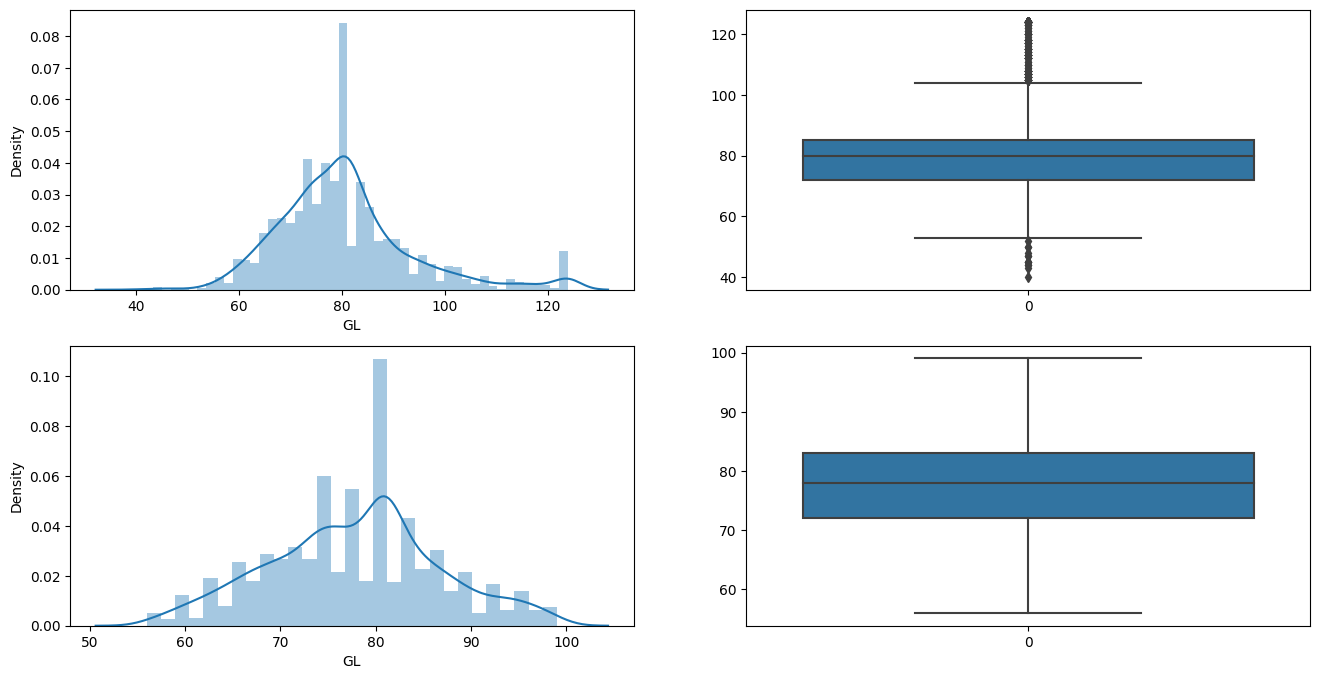

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['GL'])
plt.subplot(2,2,2)
sns.boxplot(data['GL'])
plt.subplot(2,2,3)
sns.distplot(new_df['GL'])
plt.subplot(2,2,4)
sns.boxplot(new_df['GL'])
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='sysBP'>

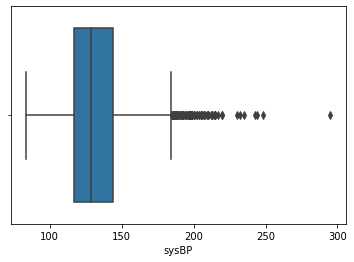

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data['sysBP'])

In [ ]:
#dealing with out layer values 
data[(data['sysBP'] > 175) | (data['sysBP'] < 90)]

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
5        5   61    0           0         0.0     0.0                0   
6        6   61    1           0         0.0     0.0                0   
10      10   61    0           0         0.0     0.0                0   
37      37   63    0           0         0.0     0.0                0   
66      66   60    1           1        20.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3296  3296   57    0           1        43.0     0.0                0   
3308  3308   60    0           0         0.0     0.0                0   
3367  3367   59    1           1        20.0     0.0                0   
3373  3373   58    0           0         0.0     0.0                0   
3384  3384   61    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
5                1         0    272.0  182.0  121.0  32.80       85.0   
6                1         0    238.0  232.0  136.0  24.83       75.0   
10               1         0    237.0  185.0  121.0  35.22       80.0   
37               1         0    293.0  186.5   97.0  30.47       60.0   
66               1         0    260.0  178.0  103.0  24.62       72.0   
...            ...       ...      ...    ...    ...    ...        ...   
3296             1         0    283.0  207.5  118.0  38.61      100.0   
3308             1         0    352.0  197.5  105.0  36.29       75.0   
3367             1         0    206.0  187.0   97.0  26.00      100.0   
3373             0         1    260.0   85.5   51.0  20.76       87.0   
3384             1         0    217.0  182.0   86.0  26.98      105.0   

         glucose  TenYearCHD  
5      65.000000           1  
6      79.000000           0  
10     82.000000           0  
37     96.000000           0  
66     79.000000           0  
...          ...         ...  
3296   83.000000           1  
3308   95.000000           1  
3367   69.000000           0  
3373  151.474224           1  
3384  113.000000           0  

[174 rows x 16 columns]

In [ ]:
new_df = data[(data['sysBP'] <175) & (data['sysBP'] >90)]
new_df

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0   64    0           1         3.0     0.0                0   
1        1   36    1           0         0.0     0.0                0   
2        2   46    0           1        10.0     0.0                0   
3        3   50    1           1        20.0     0.0                0   
4        4   64    0           1        30.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3385  3385   60    0           0         0.0     0.0                0   
3386  3386   46    0           0         0.0     0.0                0   
3387  3387   44    1           1         3.0     0.0                0   
3388  3388   60    1           0         0.0     0.0                0   
3389  3389   54    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.00       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3203 rows x 16 columns]

In [ ]:
#storing the values 
upper_limit = data['sysBP'].mean() + 3*data['sysBP'].std()
lower_limit = data['sysBP'].mean() - 3*data['sysBP'].std()

In [ ]:
data['sysBP'] = np.where(
    data['sysBP']>upper_limit,
    upper_limit,
    np.where(
        data['sysBP']<lower_limit,
        lower_limit,
        data['sysBP']
    )
)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:

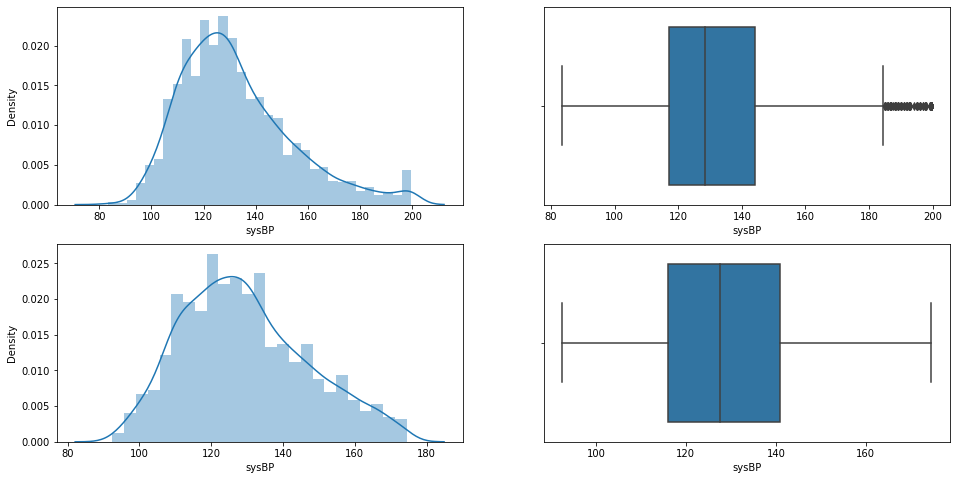

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['sysBP'])
plt.subplot(2,2,2)
sns.boxplot(data['sysBP'])
plt.subplot(2,2,3)
sns.distplot(new_df['sysBP'])
plt.subplot(2,2,4)
sns.boxplot(new_df['sysBP'])
plt.show()

In [ ]:
#checking for the out layers with STD
print("Highest allowed",data['heartRate'].mean() + 3*data['heartRate'].std())
print("Lowest allowed",data['heartRate'].mean() - 3*data['heartRate'].std())

Highest allowed 111.8873326343464
Lowest allowed 40.06664966653856


In [ ]:
#dealing with out layer values 
data[(data['heartRate'] > 103) | (data['heartRate'] < 40.85555922142802)]

id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
81      81   41    1           1        40.0     0.0                0   
116    116   39    0           0         0.0     0.0                0   
130    130   63    1           0         0.0     0.0                0   
138    138   53    0           0         0.0     0.0                0   
278    278   46    0           0         0.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3176  3176   57    0           1        20.0     1.0                0   
3278  3278   49    0           1        30.0     1.0                0   
3297  3297   46    0           1        20.0     0.0                0   
3365  3365   55    0           0         0.0     0.0                0   
3384  3384   61    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
81               0         0    254.0  141.0  100.0  27.68      110.0   
116              0         0    213.0  125.0   87.0  16.73      110.0   
130              0         1    229.0  109.0   75.0  38.42      110.0   
138              1         0    238.0  172.5   91.0  24.16      112.0   
278              1         0    239.0  166.5  107.0  19.27      110.0   
...            ...       ...      ...    ...    ...    ...        ...   
3176             1         0    262.0  140.0   93.0  22.00      108.0   
3278             1         0    350.0  174.0   90.0  18.44      110.0   
3297             0         0    203.0  117.0   68.0  21.50      110.0   
3365             0         0    310.0  135.0   76.5  26.31      110.0   
3384             1         0    217.0  182.0   86.0  26.98      105.0   

      glucose  TenYearCHD  
81       82.0           1  
116      75.0           0  
130     120.0           0  
138      82.0           0  
278      70.0           0  
...       ...         ...  
3176     82.0           1  
3278     78.0           0  
3297     85.0           0  
3365     74.0           0  
3384    113.0           0  

[73 rows x 16 columns]

In [ ]:
new_df = data[(data['heartRate'] < 103) & (data['heartRate'] >40.85555922142802)]
new_df


id  age  sex  is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0        0   64    0           1         3.0     0.0                0   
1        1   36    1           0         0.0     0.0                0   
2        2   46    0           1        10.0     0.0                0   
3        3   50    1           1        20.0     0.0                0   
4        4   64    0           1        30.0     0.0                0   
...    ...  ...  ...         ...         ...     ...              ...   
3385  3385   60    0           0         0.0     0.0                0   
3386  3386   46    0           0         0.0     0.0                0   
3387  3387   44    1           1         3.0     0.0                0   
3388  3388   60    1           0         0.0     0.0                0   
3389  3389   54    0           0         0.0     0.0                0   

      prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  \
0                0         0    221.0  148.0   85.0  25.00       90.0   
1                1         0    212.0  168.0   98.0  29.77       72.0   
2                0         0    250.0  116.0   71.0  20.35       88.0   
3                1         0    233.0  158.0   88.0  28.26       68.0   
4                0         0    241.0  136.5   85.0  26.42       70.0   
...            ...       ...      ...    ...    ...    ...        ...   
3385             0         0    261.0  123.5   79.0  29.28       70.0   
3386             0         0    199.0  102.0   56.0  21.96       80.0   
3387             1         0    352.0  164.0  119.0  28.92       73.0   
3388             1         0    191.0  167.0  105.0  23.01       80.0   
3389             0         0    288.0  124.0   77.0  29.88       79.0   

      glucose  TenYearCHD  
0        80.0           1  
1        75.0           0  
2        94.0           0  
3        94.0           1  
4        77.0           0  
...       ...         ...  
3385    103.0           0  
3386     84.0           0  
3387     72.0           1  
3388     85.0           0  
3389     92.0           0  

[3313 rows x 16 columns]

In [ ]:
#storing the values 
upper_limit = data['heartRate'].mean() + 3*data['heartRate'].std()
lower_limit = data['heartRate'].mean() - 3*data['heartRate'].std()

In [ ]:
data['heartRate'] = np.where(
    data['heartRate']>upper_limit,
    upper_limit,
    np.where(
        data['heartRate']<lower_limit,
        lower_limit,
        data['heartRate']
    )
)

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:

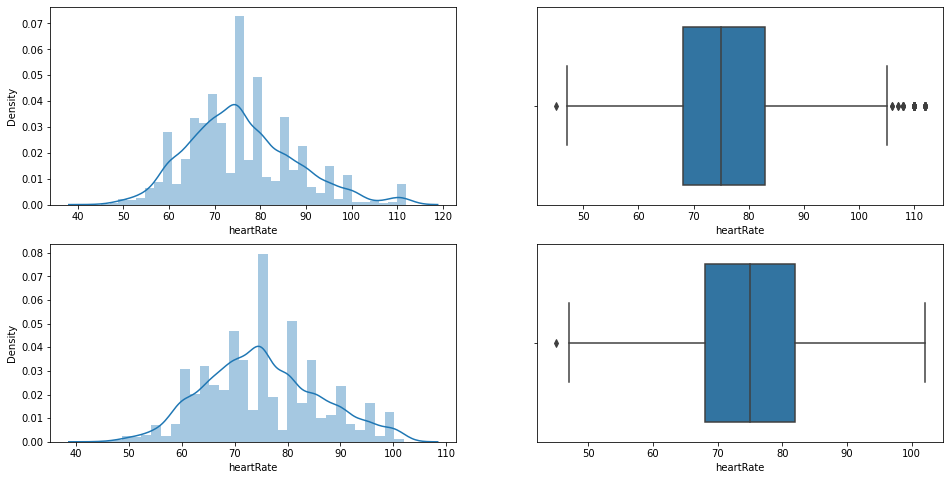

In [ ]:
#ploting the outlayer removing 
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['heartRate'])
plt.subplot(2,2,2)
sns.boxplot(data['heartRate'])
plt.subplot(2,2,3)
sns.distplot(new_df['heartRate'])
plt.subplot(2,2,4)
sns.boxplot(new_df['heartRate'])
plt.show()

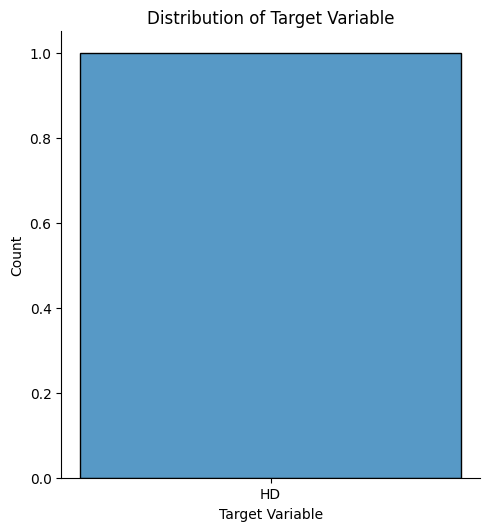

In [ ]:
import seaborn as sns

# Sample target variable data
target_variable = ['HD']

# Plot the distribution
sns.displot(target_variable, kde=False)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()


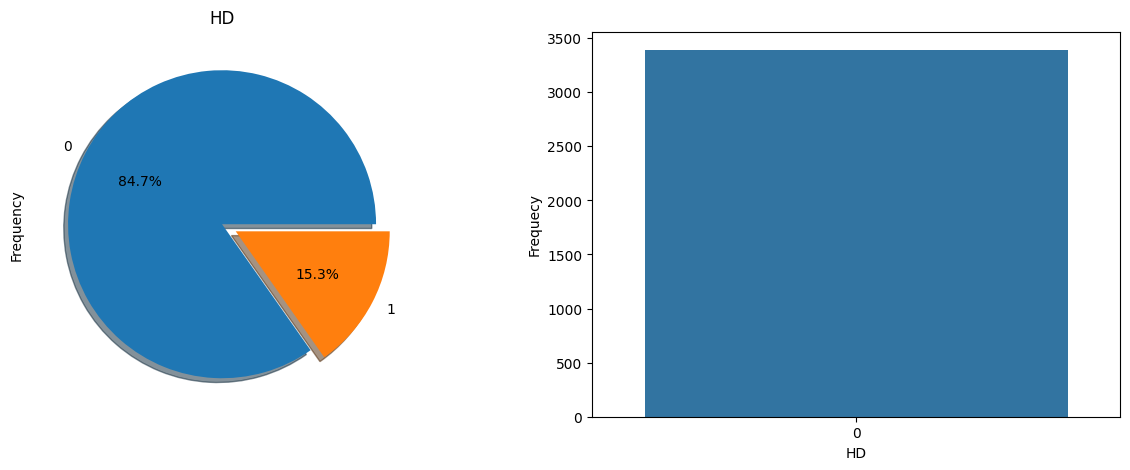

In [ ]:
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(data['HD'])
#plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("HD")
plt.ylabel("Frequecy")

#Piechart show
data['HD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('HD')
ax[0].set_ylabel('Frequency')
plt.show()

In [ ]:
data_boxcox = data.copy()
X = data_boxcox.drop(["HD"],axis=1)
Y = data_boxcox["HD"]

In [ ]:
#To keep BoxCox data as it is to use the same for later.
data_bal = data_boxcox.copy()

#Getting seperated data with 1 and 0 status.
df_majority = data_bal[data_bal.HD==0]
df_minority = data_bal[data_bal.HD==1]

#Here we are downsampling the Majority Class Data Points. 
#i.e. We will get equal amount of datapoint as Minority class from Majority class

df_manjority_downsampled = resample(df_majority,replace=False,n_samples=268,random_state=123)
df_downsampled = pd.concat([df_manjority_downsampled,df_minority])
print("Downsampled data:->\n",df_downsampled.HD.value_counts())

#Here we are upsampling the Minority Class Data Points. 
#i.e. We will get equal amount of datapoint as Majority class from Minority class
df_monority_upsampled = resample(df_minority,replace=True,n_samples=2000,random_state=123)
df_upsampled = pd.concat([df_majority,df_monority_upsampled])
print("Upsampled data:->\n",df_upsampled.HD.value_counts())

Downsampled data:->
 1    517
0    268
Name: HD, dtype: int64
Upsampled data:->
 0    2873
1    2000
Name: HD, dtype: int64


Text(0.5, 0, 'Outcome')

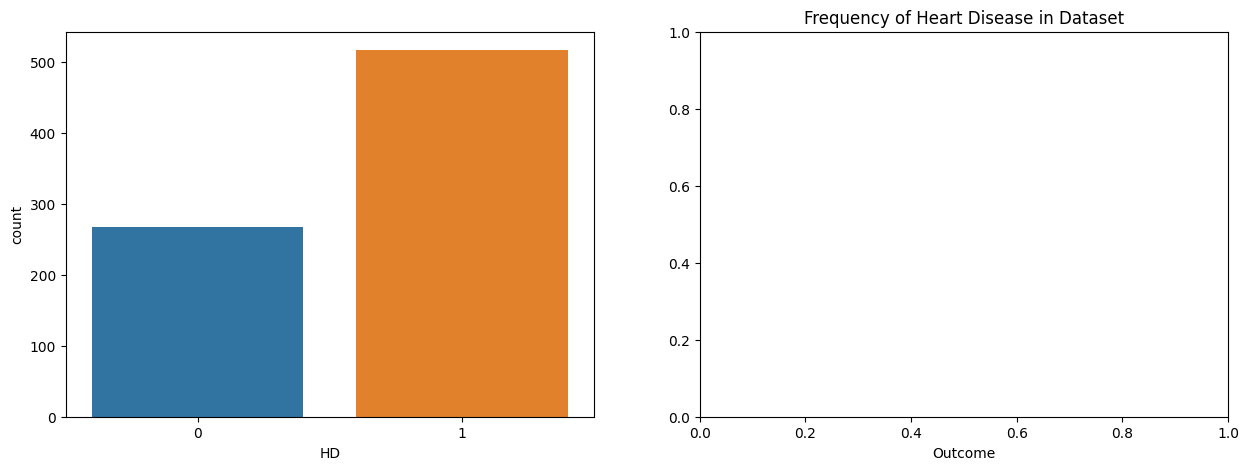

In [ ]:
#Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_downsampled['TenYearCHD'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel("Outcome")
# plt.ylabel("Frequecy")
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HD', data=df_downsampled, ax=ax[0])
plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")

#Piechart show
# df_downsampled['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('TenYearCHD')
# ax[0].set_ylabel('Frequency')
# plt.show()

Text(0.5, 0, 'Outcome')

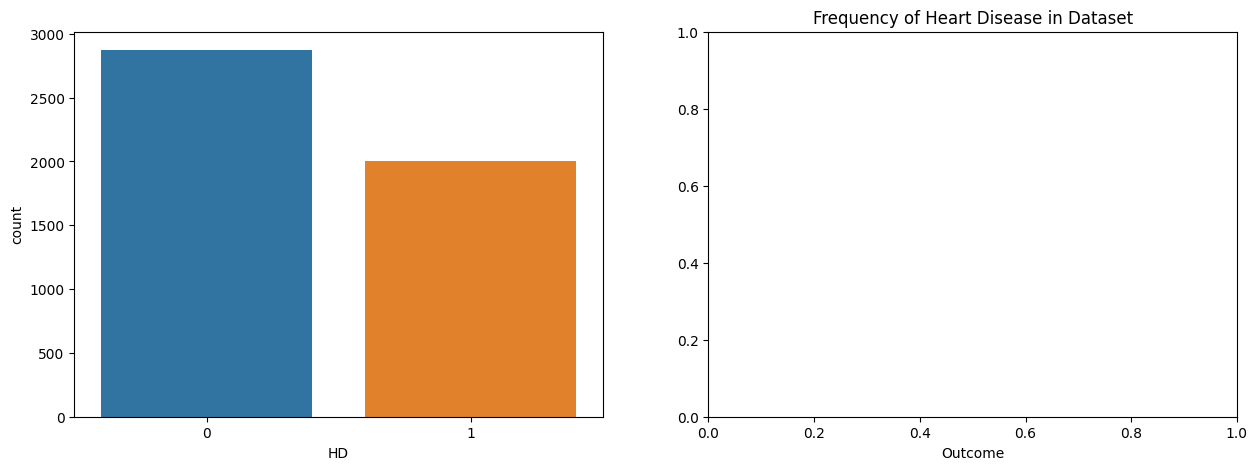

In [ ]:
#Plot the diabetic Values
# f,ax=plt.subplots(1,2,figsize=(15,5))
# sns.countplot(df_upsampled['TenYearCHD'])
# plt.title("Frequency of Heart Disease in Dataset")
# plt.xlabel("Outcome")
# plt.ylabel("Frequecy")
# #Piechart show
# df_upsampled['TenYearCHD'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
# ax[0].set_title('TenYearCHD')
# ax[0].set_ylabel('Frequency')
# plt.show()
#Plot the diabetic Values
f,ax=plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='HD', data=df_upsampled, ax=ax[0])
plt.title("Frequency of Heart Disease in Dataset")
plt.xlabel("Outcome")

In [ ]:
#lets describe the data
df_upsampled.describe().T

count        mean        std     min     25%     50%     75%    max
SX   4873.0    0.457418   0.498235    0.00    0.00    0.00    1.00    1.0
AG   4873.0   50.980915   8.673365   32.00   44.00   51.00   58.00   70.0
SM   4873.0    0.506875   0.500004    0.00    0.00    1.00    1.00    1.0
CPD  4873.0    9.711882  12.236060    0.00    0.00    1.00   20.00   70.0
BPM  4873.0    0.035297   0.184547    0.00    0.00    0.00    0.00    1.0
PS   4873.0    0.009235   0.095662    0.00    0.00    0.00    0.00    1.0
PH   4873.0    0.369588   0.482743    0.00    0.00    0.00    1.00    1.0
DB   4873.0    0.034270   0.181942    0.00    0.00    0.00    0.00    1.0
TC   4873.0  240.055613  46.110677  107.00  210.00  237.00  267.00  696.0
SBP  4873.0  135.771188  24.083334   83.50  119.00  131.00  148.00  295.0
DBP  4873.0   84.487790  12.739173   50.00   76.00   83.00   91.00  142.5
BMI  4873.0   26.107088   4.330954   15.54   23.28   25.63   28.45   56.8
HR   4873.0   75.891648  12.037169   44.00   68.00   75.00   83.00  143.0
GL   4873.0   83.609891  27.262203   40.00   73.00   80.00   87.00  394.0
HD   4873.0    0.410425   0.491961    0.00    0.00    0.00    1.00    1.0

In [ ]:
#lets describe the data
df_downsampled.describe().T

count        mean        std     min    25%     50%     75%    max
SX   785.0    0.477707   0.499821    0.00    0.0    0.00    1.00    1.0
AG   785.0   51.935032   8.614008   34.00   45.0   52.00   59.00   70.0
SM   785.0    0.527389   0.499568    0.00    0.0    1.00    1.00    1.0
CPD  785.0   10.327389  12.682286    0.00    0.0    3.00   20.00   60.0
BPM  785.0    0.040764   0.197870    0.00    0.0    0.00    0.00    1.0
PS   785.0    0.010191   0.100499    0.00    0.0    0.00    0.00    1.0
PH   785.0    0.402548   0.490724    0.00    0.0    0.00    1.00    1.0
DB   785.0    0.043312   0.203689    0.00    0.0    0.00    0.00    1.0
TC   785.0  242.487898  45.787778  107.00  212.0  238.00  269.00  600.0
SBP  785.0  138.232484  25.219554   85.50  120.0  133.00  151.50  295.0
DBP  785.0   84.904459  12.959702   51.00   76.0   83.00   92.00  140.0
BMI  785.0   26.194357   4.258444   15.96   23.4   25.72   28.62   56.8
HR   785.0   75.907006  12.026025   50.00   68.0   75.00   83.00  120.0
GL   785.0   85.796178  32.206314   40.00   73.0   80.00   87.00  394.0
HD   785.0    0.658599   0.474482    0.00    0.0    1.00    1.00    1.0

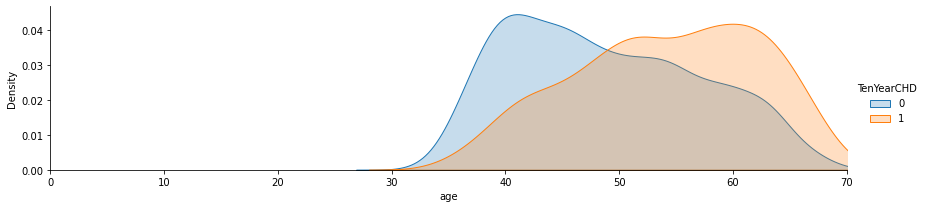

In [ ]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'age', shade=True)
oldest = data['age'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

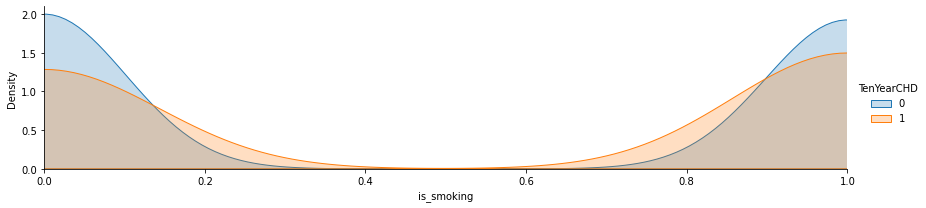

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'is_smoking', shade=True)
oldest = data['is_smoking'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

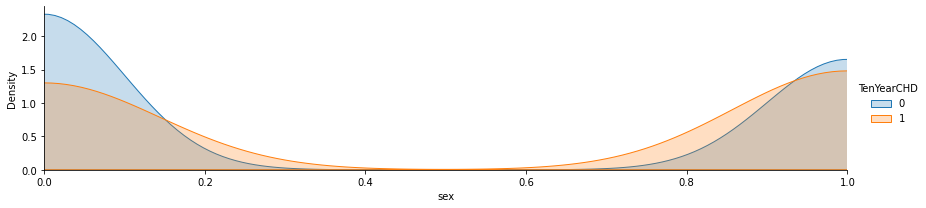

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'sex', shade=True)
oldest = data['sex'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

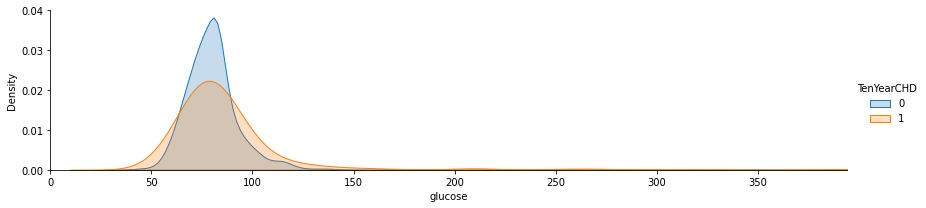

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'glucose', shade=True)
oldest = data['glucose'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

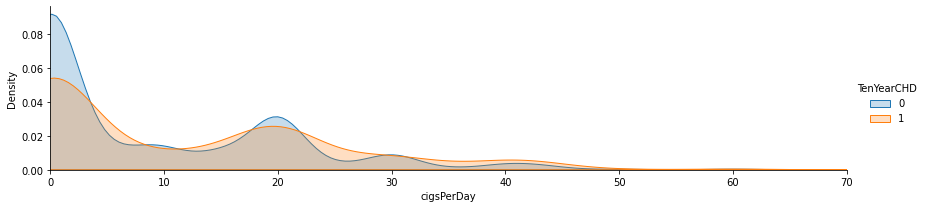

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'cigsPerDay', shade=True)
oldest = data['cigsPerDay'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

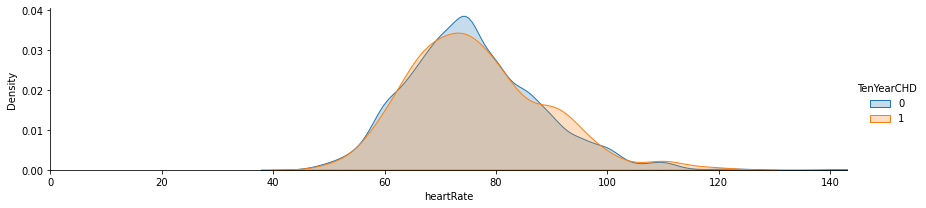

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'heartRate', shade=True)
oldest = data['heartRate'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

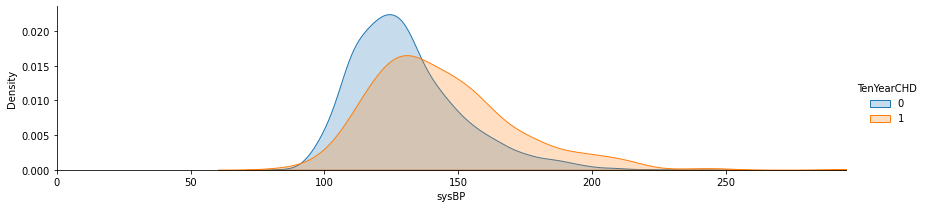

In [ ]:
fig = sns.FacetGrid(data, hue="TenYearCHD", aspect=4)
fig.map(sns.kdeplot, 'sysBP', shade=True)
oldest = data['sysBP'].max()
fig.set(xlim=(0, oldest))
fig.add_legend()

In [ ]:
plt.figure(figsize=(30, 30))
sns.pairplot(data, hue='TenYearCHD', height=3, diag_kind='hist')

In [ ]:
#reading data from pandas
col_names = ['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']
df = pd.read_csv("train.csv", header=1, names=col_names)

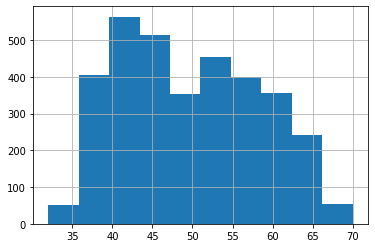

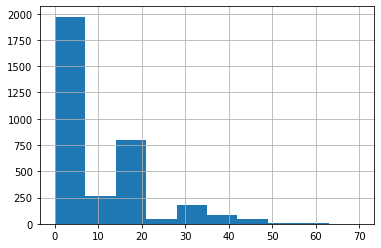

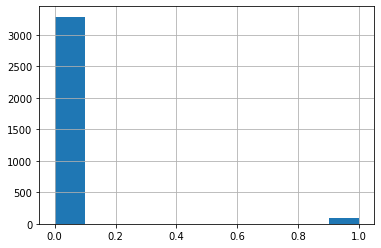

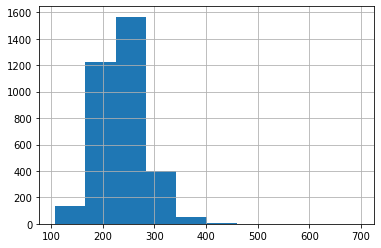

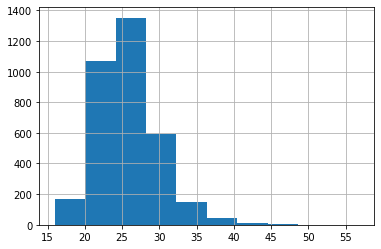

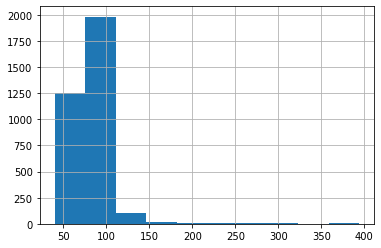

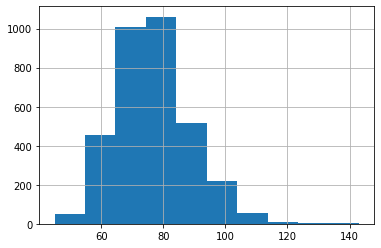

After normal distibution operation



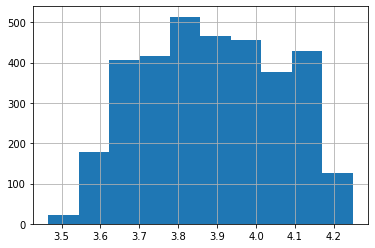

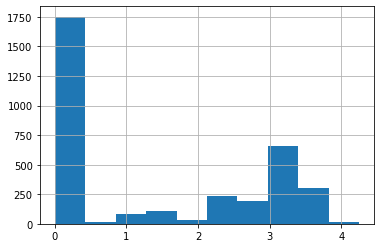

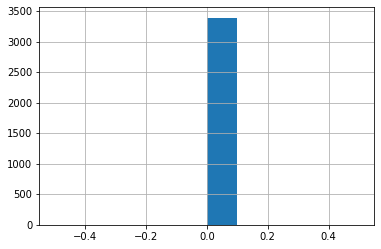

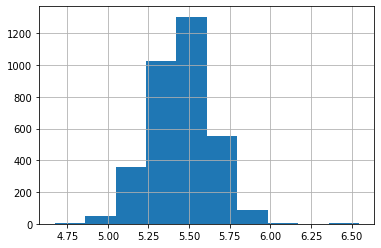

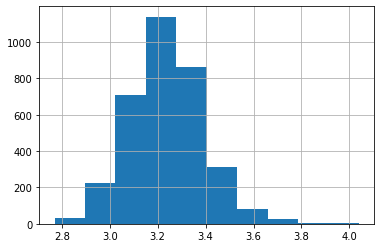

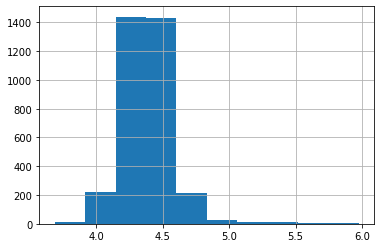

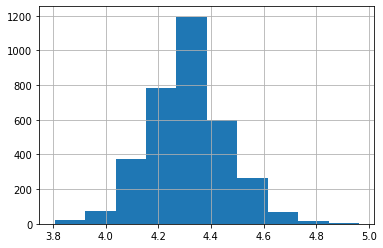

In [ ]:
#'age' , 'sex', 'cigsPerDay', 'BPMeds',  'totChol', 'BMI', 'heartRate', 'glucose' 
data_new = data.copy()

data_new["age"].hist()
plt.show()
data_new["cigsPerDay"].hist()
plt.show()
data_new["BPMeds"].hist()
plt.show()
data_new["totChol"].hist()
plt.show()
data_new["BMI"].hist()
plt.show()
data_new["glucose"].hist()
plt.show()
data_new["heartRate"].hist()
plt.show()

data_new["age"] = [np.log(i) if i!=0 else 0 for i in data_new["age"]]
data_new["cigsPerDay"] = [np.log(i) if i!=0 else 0 for i in data_new["cigsPerDay"]]
data_new["BPMeds"] = [np.log(i) if i!=0 else 0 for i in data_new["BPMeds"]]
data_new["totChol"] = [np.log(i) if i!=0 else 0 for i in data_new["totChol"]]
data_new["BMI"] = [np.log(i) if i!=0 else 0 for i in data_new["BMI"]]
data_new["glucose"] = [np.log(i) if i!=0 else 0 for i in data_new["glucose"]]
data_new["heartRate"] = [np.log(i) if i!=0 else 0 for i in data_new["heartRate"]]

print("="*10,"\nAfter normal distibution operation\n")

data_new["age"].hist()
plt.show()
data_new["cigsPerDay"].hist()
plt.show()
data_new["BPMeds"].hist()
plt.show()
data_new["totChol"].hist()
plt.show()
data_new["BMI"].hist()
plt.show()
data_new["glucose"].hist()
plt.show()
data_new["heartRate"].hist()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       545
           1       0.97      0.88      0.92       430

    accuracy                           0.93       975
   macro avg       0.94      0.93      0.93       975
weighted avg       0.94      0.93      0.93       975

0.9343589743589743


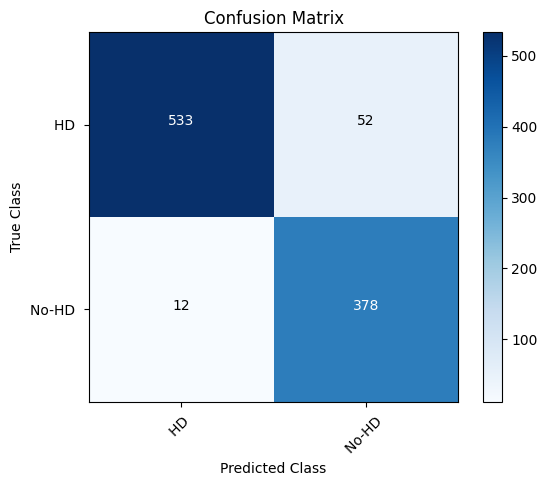

In [ ]:
from sklearn import  metrics 
classes = ["HD ", "No-HD "]
X = df_upsampled.drop(["HD"],axis=1)
Y = df_upsampled["HD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)

XGBR = XGBClassifier(learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)
XGBR.fit(X_train,y_train)
y_pred = XGBR.predict(X_test)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#confusion_matrix(XGBR,X_test,y_test,labels=["Heart Disease","No-Heart Disease"],cm=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
featur_names = ['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']
features = XGBR.feature_importances_
features

array([0.01295288, 0.02514433, 0.01380079, 0.01772802, 0.25734866,
       0.        , 0.01973426, 0.5249077 , 0.02040175, 0.02354502,
       0.02212041, 0.01908493, 0.02089781, 0.02233352], dtype=float32)

In [ ]:
import xgboost as xgb

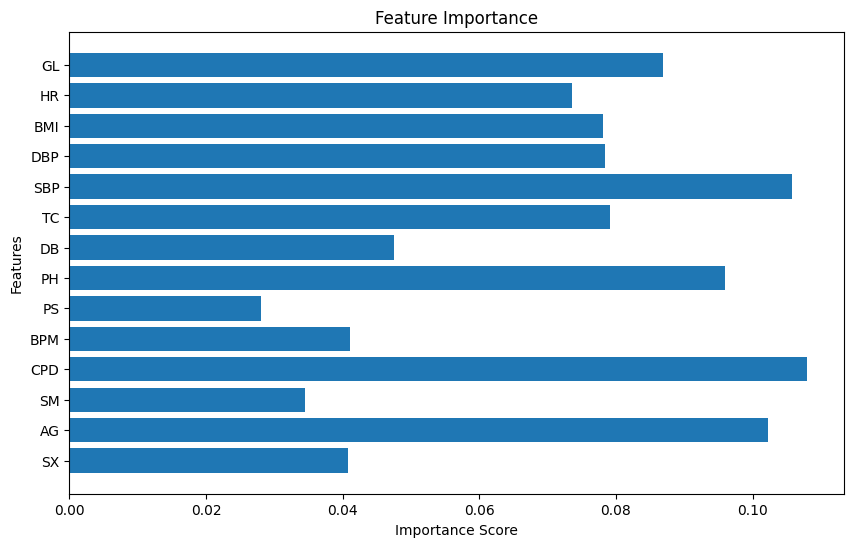

In [ ]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
data.columns

Index(['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD'],
      dtype='object')

In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
X = np.array(df_upsampled[['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']])
Y = np.array(df_upsampled.HD)
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)


models = []
models.append(("XGB",XGBClassifier()))
models.append(("ADB",AdaBoostClassifier()))
models.append(("GB",GradientBoostingClassifier()))
models.append(("LightGBM",LGBMClassifier()))
models.append(("Catboost",CatBoostClassifier()))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       545
           1       0.97      0.88      0.92       430

    accuracy                           0.93       975
   macro avg       0.94      0.93      0.93       975
weighted avg       0.94      0.93      0.93       975

0.9343589743589743


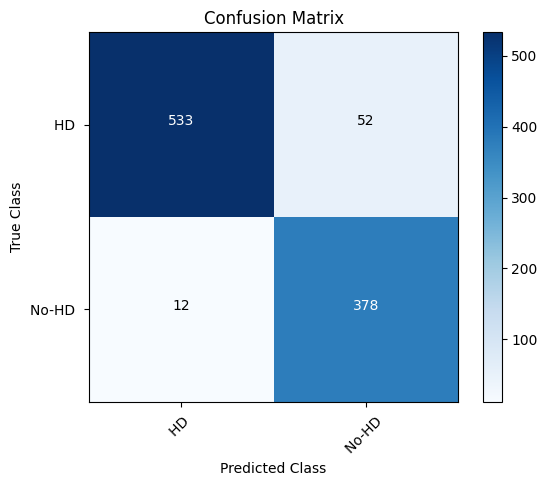

In [ ]:
#XGB
X = df_upsampled.drop(["HD"],axis=1)
Y = df_upsampled["HD"]

X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model1 = XGBClassifier (learning_rate =0.1,n_estimators=100000,max_depth=6,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,
reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

#(learning_rate =0.1,n_estimators=10000,max_depth=4,min_child_weight=6,gamma=0,subsample=0.6,colsample_bytree=0.8,reg_alpha=0.005, objective= 'binary:logistic', nthread=2, scale_pos_weight=1, seed=27)

Model1.fit(X_train,y_train)
y_pred = Model1.predict(X_test)
fpr_Model1, tpr_Model1, thresholds_Model1 = roc_curve(y_test, y_pred)
roc_auc_Model1 = auc (fpr_Model1, tpr_Model1)
precision_Model1, recall_Model1, th_Model1 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))

#plot_confusion_matrix(Model1,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']
features =Model1.feature_importances_
features

array([0.03076518, 0.04241412, 0.0280909 , 0.02450028, 0.01863672,
       0.02621581, 0.34073415, 0.        , 0.02351246, 0.24717371,
       0.03455588, 0.03999415, 0.03928909, 0.03500191, 0.03587921,
       0.03323643], dtype=float32)

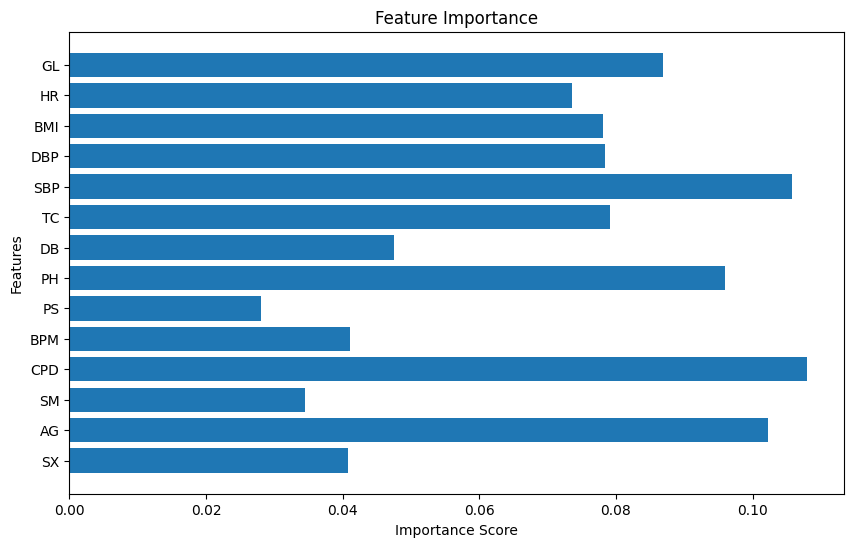

In [ ]:
xgbr = xgb.XGBRegressor()
xgbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = xgbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       615
           1       0.64      0.70      0.67       360

    accuracy                           0.75       975
   macro avg       0.73      0.74      0.73       975
weighted avg       0.75      0.75      0.75       975

0.7456410256410256


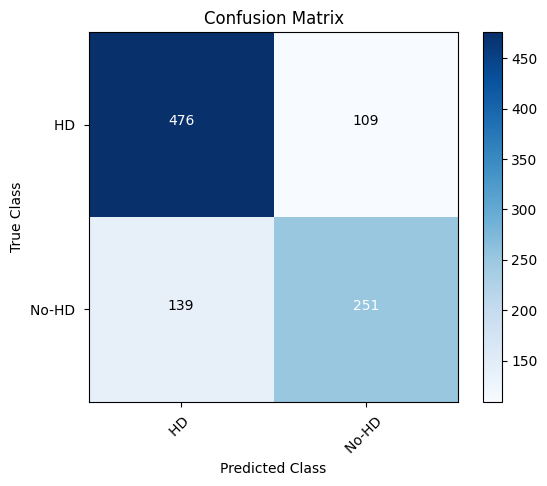

In [ ]:
#Ada Boost
X = df_upsampled.drop(["HD"],axis=1)
Y = df_upsampled["HD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model2 = AdaBoostClassifier(n_estimators=20000,learning_rate=0.1,random_state=None)
#(random_state=0, learning_rate =0.1,n_estimators=100)
Model2.fit(X_train,y_train)
y_pred = Model2.predict(X_test)
fpr_Model2, tpr_Model2, thresholds_Model2 = roc_curve(y_test, y_pred)
roc_auc_Model2 = auc (fpr_Model2, tpr_Model2)
precision_Model2, recall_Model2, th_Model2 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model2,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")


In [ ]:
#Features Importance Bar Plot
featur_names = ['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']
features =Model2.feature_importances_
features


array([3.200e-03, 2.455e-02, 0.000e+00, 9.550e-03, 1.000e-04, 6.000e-04,
       2.000e-03, 0.000e+00, 1.440e-01, 2.062e-01, 9.165e-02, 3.496e-01,
       6.225e-02, 1.063e-01])

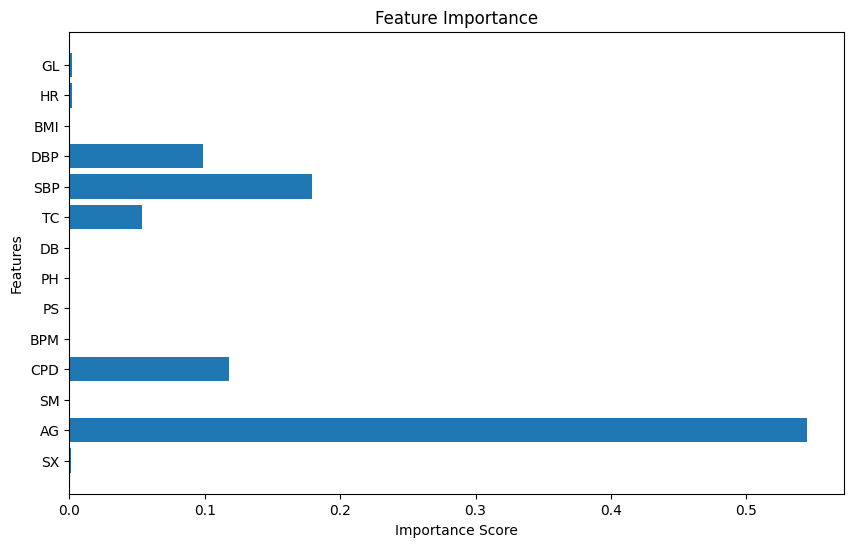

In [ ]:
ada = AdaBoostRegressor()
ada.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = ada.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

In [ ]:
X_train.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
dtype: int64

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       584
           1       0.96      0.96      0.96       391

    accuracy                           0.97       975
   macro avg       0.97      0.97      0.97       975
weighted avg       0.97      0.97      0.97       975

0.9682051282051282


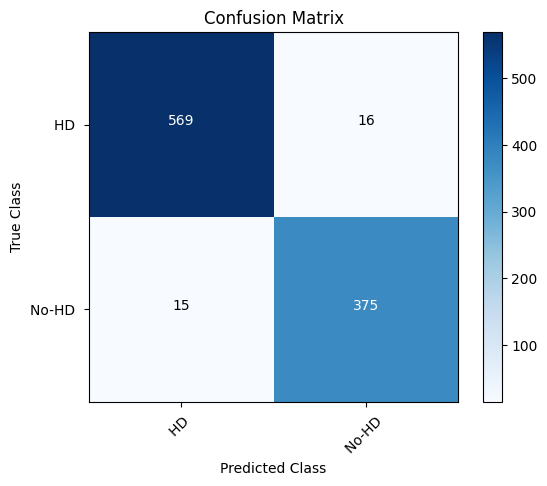

In [ ]:
# GB Boost
X = df_upsampled.drop(["HD"],axis=1)
Y = df_upsampled["HD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model3 = GradientBoostingClassifier(random_state=45, learning_rate =0.1,n_estimators=10000,max_depth=10)
Model3.fit(X_train,y_train)
y_pred = Model3.predict(X_test)
fpr_Model3, tpr_Model3, thresholds_Model3 = roc_curve(y_test, y_pred)
roc_auc_Model3 = auc (fpr_Model3, tpr_Model3)
precision_Model3, recall_Model3, th_Model3 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model3,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']
features =Model3.feature_importances_
features

array([0.0171682 , 0.16444243, 0.00216607, 0.06961752, 0.0028781 ,
       0.00167268, 0.01229339, 0.00383705, 0.13861805, 0.13505547,
       0.11047873, 0.13842591, 0.09185788, 0.11148853])

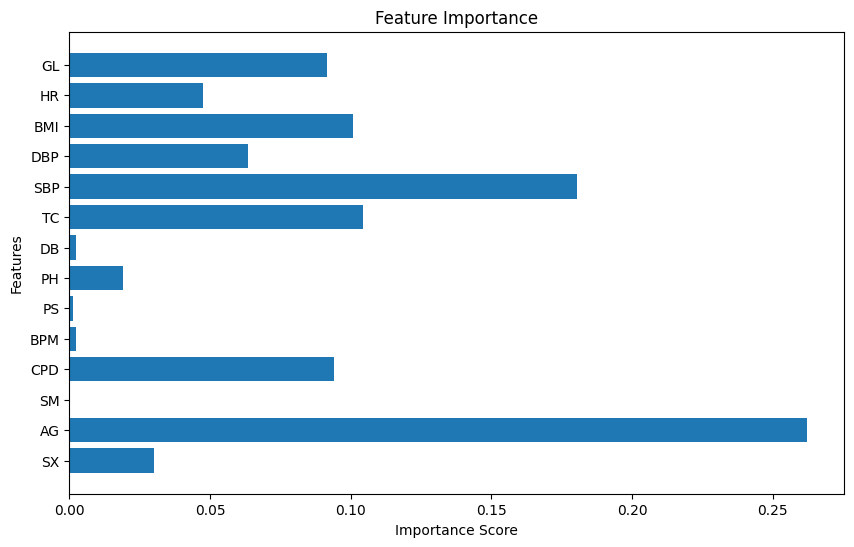

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = gbr.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       559
           1       0.97      0.91      0.94       416

    accuracy                           0.95       975
   macro avg       0.95      0.94      0.95       975
weighted avg       0.95      0.95      0.95       975

0.9466666666666667


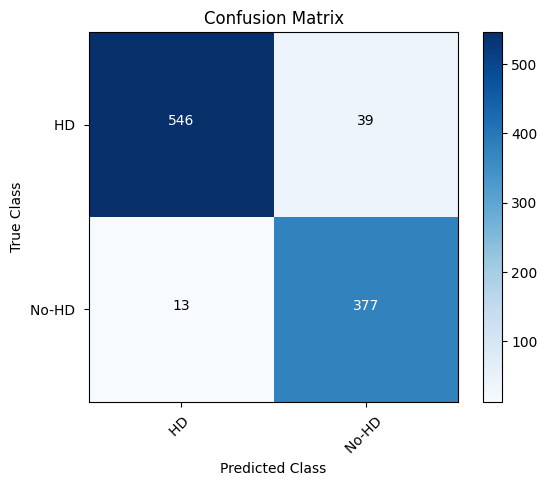

In [ ]:
#LightGBM
X = df_upsampled.drop(["HD"],axis=1)
Y = df_upsampled["HD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model4 = LGBMClassifier(random_state=45, n_estimators= 10000, max_depth=8)
Model4.fit(X_train,y_train)
y_pred = Model4.predict(X_test)
fpr_Model4, tpr_Model4, thresholds_Model4 = roc_curve(y_test, y_pred)
roc_auc_Model4 = auc (fpr_Model4, tpr_Model4)
precision_Model4, recall_Model4, th_Model4 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model4,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#### Features Importance Bar Plot
featur_names = ['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']
features =Model4.feature_importances_
features

array([ 1285,  8508,   407,  3623,   159,    57,   710,    51, 14498,
       13158, 11304, 17083,  7584,  9804], dtype=int32)

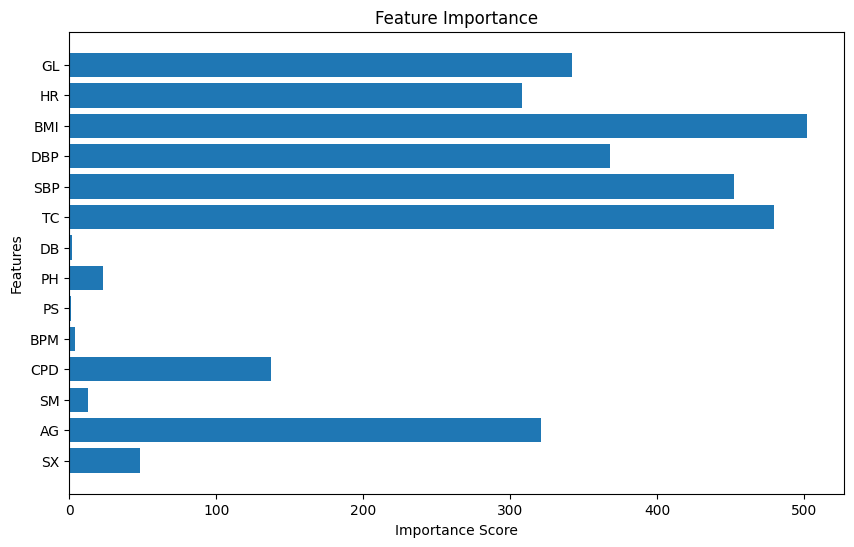

In [ ]:
import lightgbm as lgb
lgb_reg = lgb.LGBMRegressor()
lgb_reg.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = lgb_reg.feature_importances_
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


Learning rate set to 0.018417
0:	learn: 0.6887385	total: 49.2ms	remaining: 49.2s
1:	learn: 0.6841475	total: 51.7ms	remaining: 25.8s
2:	learn: 0.6801176	total: 54.2ms	remaining: 18s
3:	learn: 0.6757981	total: 56.8ms	remaining: 14.1s
4:	learn: 0.6719357	total: 59.2ms	remaining: 11.8s
5:	learn: 0.6675144	total: 61.8ms	remaining: 10.2s
6:	learn: 0.6634580	total: 64.2ms	remaining: 9.1s
7:	learn: 0.6600350	total: 66.6ms	remaining: 8.26s
8:	learn: 0.6564328	total: 69.1ms	remaining: 7.61s
9:	learn: 0.6527044	total: 71.5ms	remaining: 7.08s
10:	learn: 0.6496203	total: 74.2ms	remaining: 6.67s
11:	learn: 0.6457502	total: 77ms	remaining: 6.34s
12:	learn: 0.6425745	total: 79.5ms	remaining: 6.04s
13:	learn: 0.6395390	total: 81.9ms	remaining: 5.77s
14:	learn: 0.6359830	total: 84.3ms	remaining: 5.53s
15:	learn: 0.6331037	total: 86.8ms	remaining: 5.34s
16:	learn: 0.6301882	total: 89.1ms	remaining: 5.15s
17:	learn: 0.6276435	total: 91.5ms	remaining: 4.99s
18:	learn: 0.6251998	total: 93.8ms	remaining: 4.8

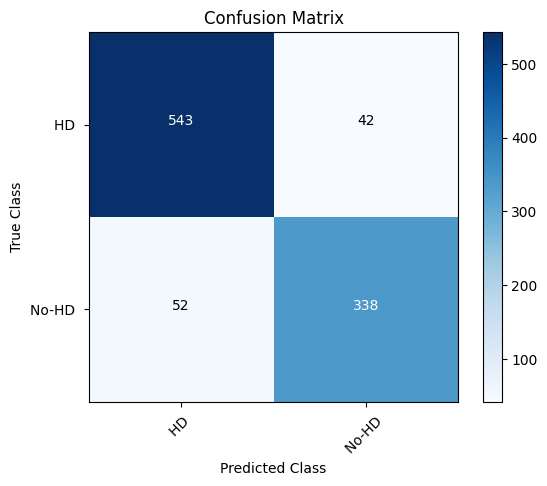

In [ ]:
#CAT Boost
X = df_upsampled.drop(["HD"],axis=1)
Y = df_upsampled["HD"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.20,random_state=0)
Model5 = CatBoostClassifier(random_state=45, n_estimators=1000, max_depth=7)
Model5.fit(X_train,y_train)
y_pred = Model5.predict(X_test)
fpr_Model5, tpr_Model5, thresholds_Model5 = roc_curve(y_test, y_pred)
roc_auc_Model5 = auc (fpr_Model5, tpr_Model5)
precision_Model5, recall_Model5, th_Model5 = precision_recall_curve(y_test, y_pred)
print(classification_report(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
#plot_confusion_matrix(Model5,X_test,y_test,display_labels=["LD","Non-LD"],cmap=plt.cm.Blues)
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")

# Add labels to the plot
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

In [ ]:
#Features Importance Bar Plot
featur_names = ['SX', 'AG', 'SM', 'CPD', 'BPM', 'PS', 'PH', 'DB', 'TC', 'SBP', 'DBP',
       'BMI', 'HR', 'GL', 'HD']
features =Model5.feature_importances_
features

array([ 3.11363696, 14.23063768,  1.18155614,  7.01217482,  0.28793376,
        0.11822329,  1.96935542,  0.31424848, 13.19918958, 12.62711719,
       11.29699134, 12.7500414 , 10.11884369, 11.78005025])

Learning rate set to 0.050761
0:	learn: 0.4883718	total: 4.96ms	remaining: 4.96s
1:	learn: 0.4847716	total: 6.99ms	remaining: 3.48s
2:	learn: 0.4812181	total: 8.23ms	remaining: 2.73s
3:	learn: 0.4783308	total: 10.1ms	remaining: 2.52s
4:	learn: 0.4753015	total: 12.6ms	remaining: 2.5s
5:	learn: 0.4724721	total: 13.8ms	remaining: 2.29s
6:	learn: 0.4701564	total: 15ms	remaining: 2.13s
7:	learn: 0.4677235	total: 16.3ms	remaining: 2.02s
8:	learn: 0.4654732	total: 17.8ms	remaining: 1.96s
9:	learn: 0.4635859	total: 19.9ms	remaining: 1.97s
10:	learn: 0.4615928	total: 21.5ms	remaining: 1.93s
11:	learn: 0.4595389	total: 22.7ms	remaining: 1.87s
12:	learn: 0.4577250	total: 24ms	remaining: 1.82s
13:	learn: 0.4563397	total: 25.2ms	remaining: 1.78s
14:	learn: 0.4544921	total: 26.8ms	remaining: 1.76s
15:	learn: 0.4529289	total: 28.8ms	remaining: 1.77s
16:	learn: 0.4513448	total: 30.6ms	remaining: 1.77s
17:	learn: 0.4498122	total: 31.8ms	remaining: 1.74s
18:	learn: 0.4488287	total: 33ms	remaining: 1.71s

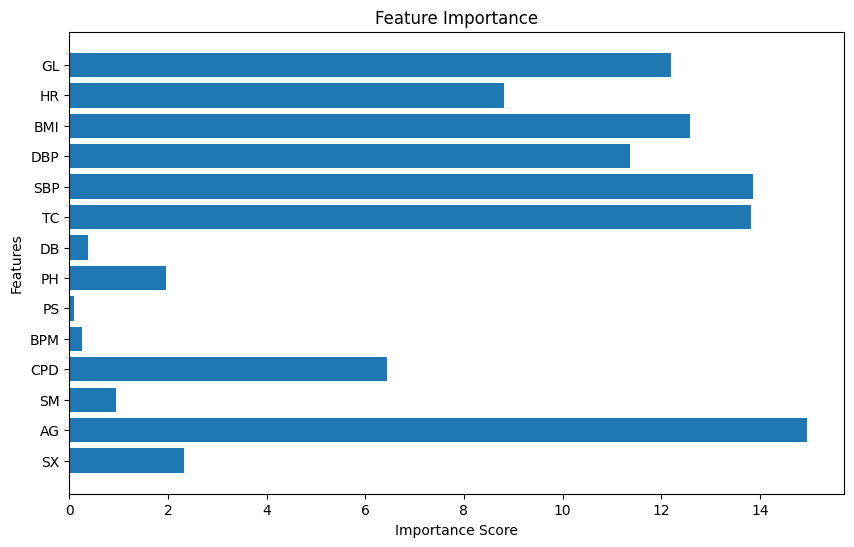

In [ ]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor()
catboost.fit(X_train, y_train)

# Get the feature importance scores
importance_scores = catboost.get_feature_importance()
feature_names = X_train.columns

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_scores)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()


In [ ]:
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                             classification_report, f1_score, average_precision_score, precision_recall_fscore_support)

In [ ]:
X = data.drop(['HD'],axis=1)
Y = data['HD']

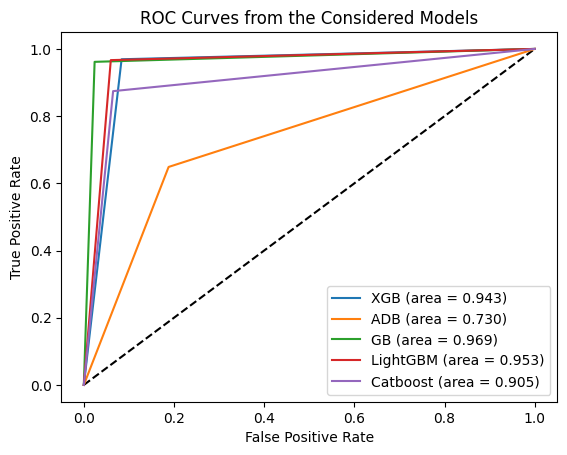

In [ ]:
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_Model1, tpr_Model1, label='XGB (area = %0.3f)' % roc_auc_Model1)
plt.plot(fpr_Model2, tpr_Model2, label='ADB (area = %0.3f)' % roc_auc_Model2)
plt.plot(fpr_Model3, tpr_Model3, label='GB (area = %0.3f)' % roc_auc_Model3)
plt.plot(fpr_Model4, tpr_Model4, label='LightGBM (area = %0.3f)' % roc_auc_Model4)
plt.plot(fpr_Model5, tpr_Model5, label='Catboost (area = %0.3f)' % roc_auc_Model5)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves from the Considered Models')
plt.legend(loc='best')
plt.show()

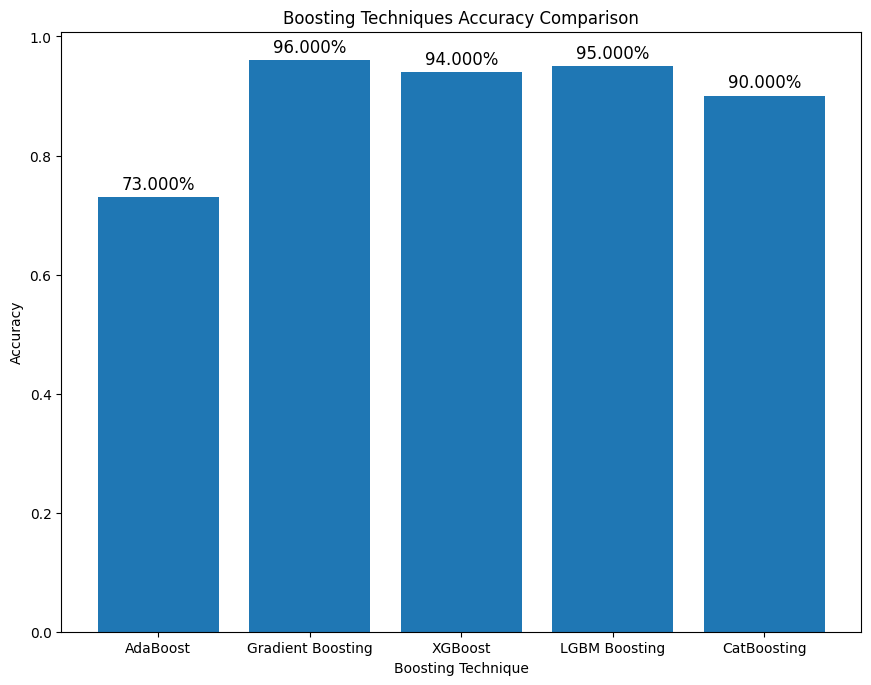

In [ ]:
import matplotlib.pyplot as plt

# Sample accuracy data
adaboost_accuracy = 0.73
gradient_boosting_accuracy = 0.96
xgboost_accuracy = 0.94
LGBM_boosting_accuracy = 0.95
CatBoost_accuracy = 0.90

# Plot the bar graph with percentages
fig = plt.figure(figsize=(8, 6))
ax = fig.add_axes([0, 0, 1, 1])
models = ['AdaBoost', 'Gradient Boosting', 'XGBoost', 'LGBM Boosting', 'CatBoosting']
accuracies = [adaboost_accuracy, gradient_boosting_accuracy, xgboost_accuracy, LGBM_boosting_accuracy, CatBoost_accuracy]
bars = ax.bar(models, accuracies)

# Add percentage values on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.3%}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)

plt.title('Boosting Techniques Accuracy Comparison')
plt.xlabel('Boosting Technique')
plt.ylabel('Accuracy')
plt.show()
